Multiple Linear Regression

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#Read the data
df=pd.read_csv('Cars.csv')
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


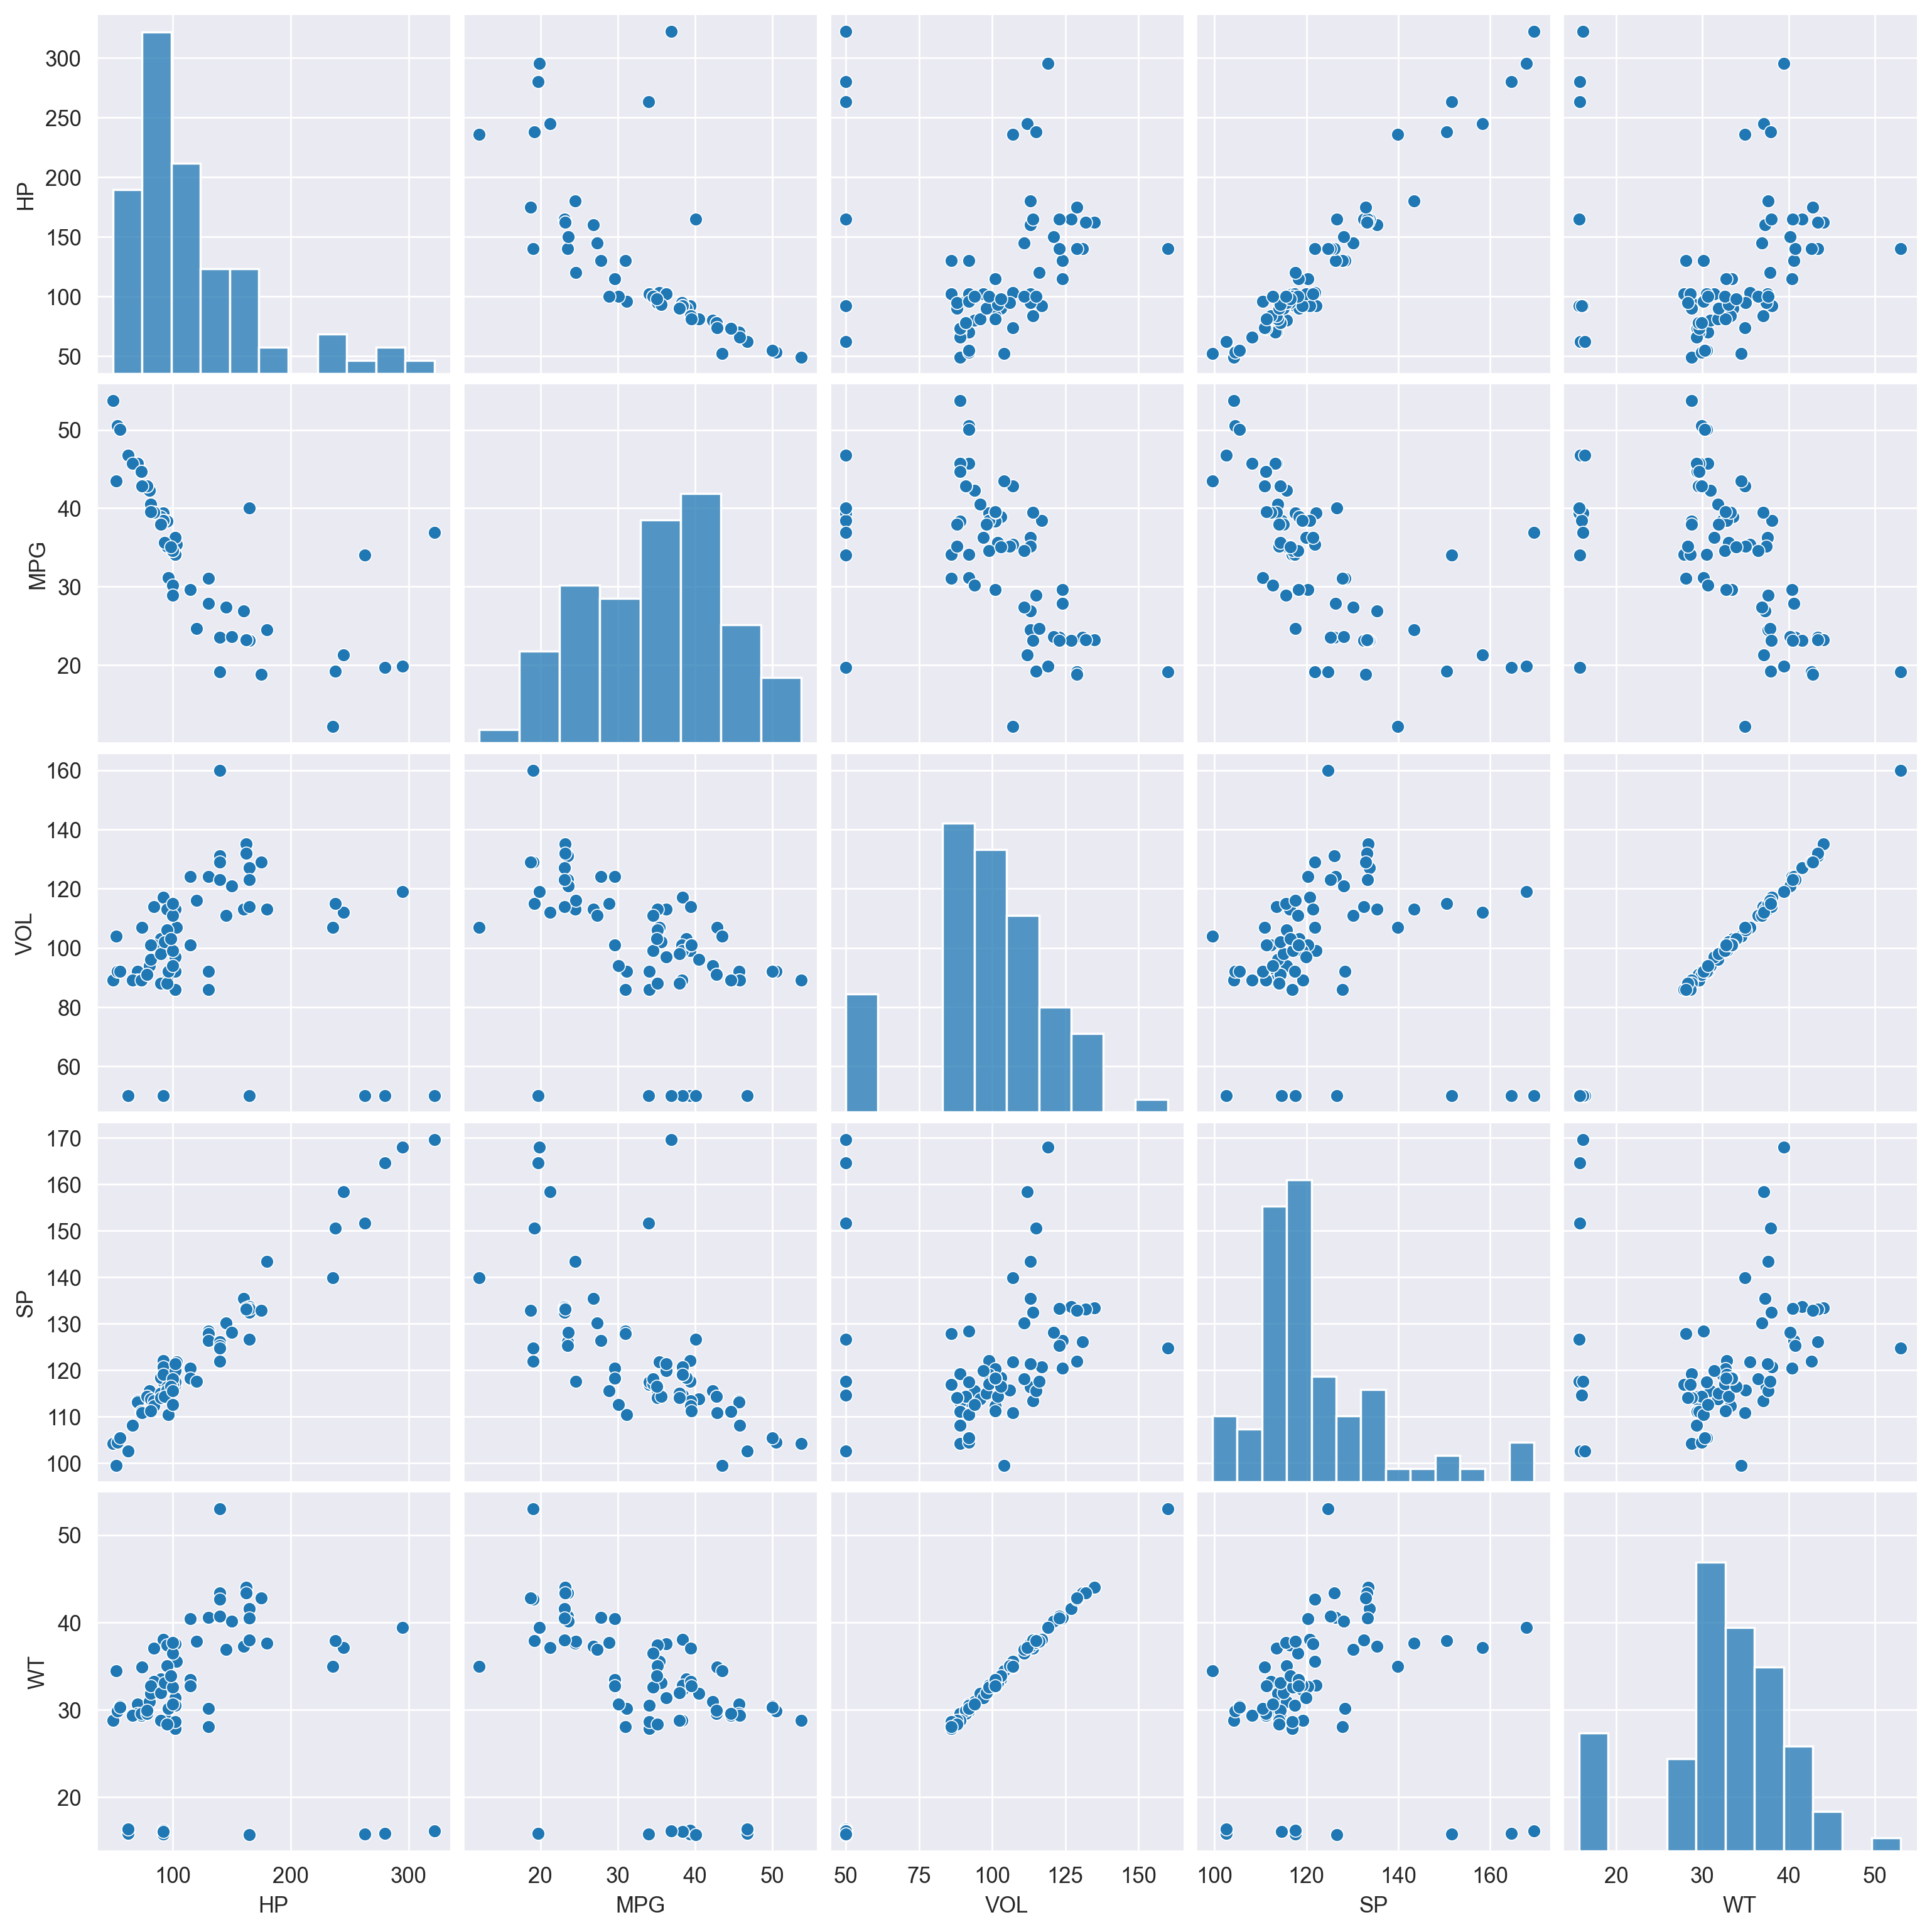

In [5]:
#Data visualization
sns.pairplot(df)

<Axes: >

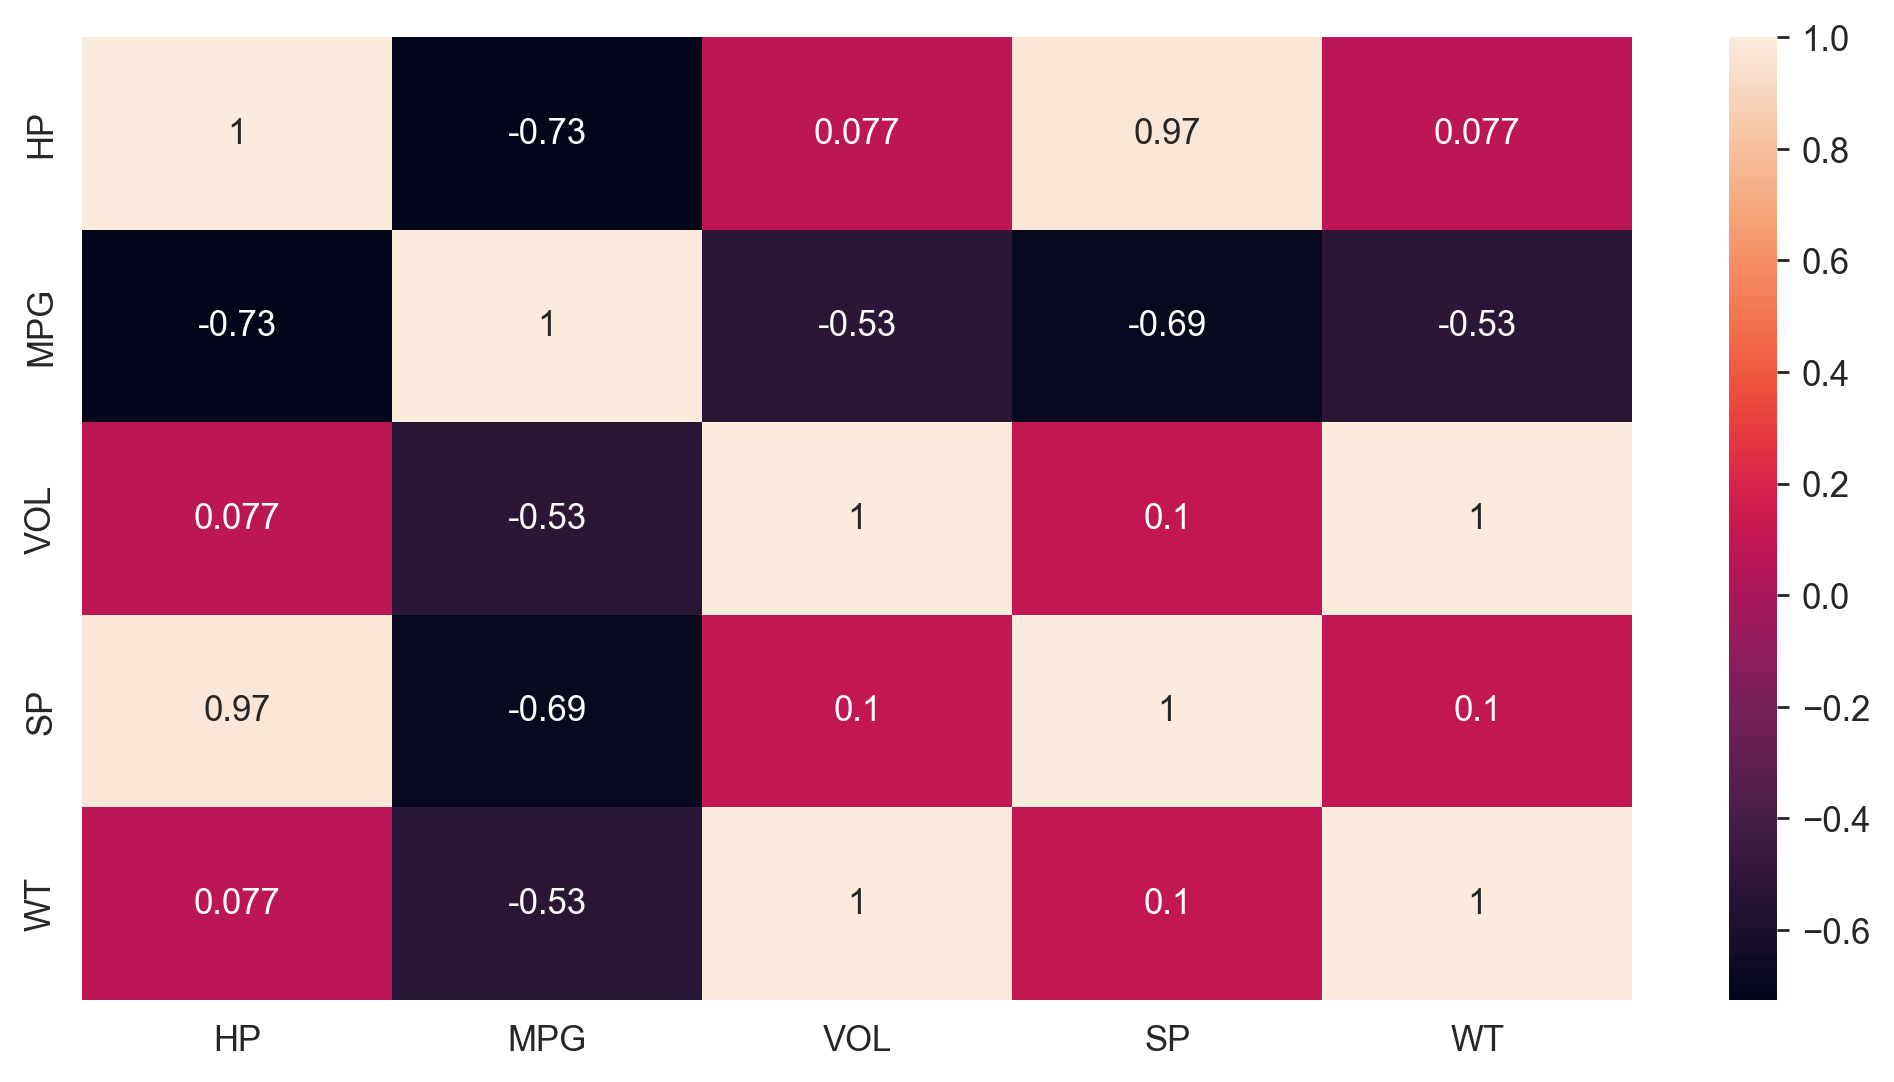

In [6]:
#Correlation
sns.heatmap(df.corr(), annot=True)

In [7]:
#Model Building
import statsmodels.formula.api as smf

In [8]:
model = smf.ols('MPG~HP+SP+WT+VOL', data = df).fit()

In [9]:
model.pvalues

Intercept    0.042936
HP           0.000001
SP           0.014579
WT           0.813649
VOL          0.556294
dtype: float64

In [10]:
#Simple Linear Regression 

In [11]:
#WT
wt= smf.ols('MPG~WT+SP+HP', data=df).fit()

In [12]:
wt.pvalues

Intercept    5.053995e-02
WT           1.914892e-13
SP           1.089096e-02
HP           7.560276e-07
dtype: float64

In [13]:
#VOL
vol= smf.ols('MPG~VOL+HP+SP', data=df).fit()

In [14]:
vol.pvalues

Intercept    4.194554e-02
VOL          1.648229e-13
HP           8.644870e-07
SP           1.207855e-02
dtype: float64

In [15]:
#Calculate VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [18]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [19]:
vif

,VIF
0,78.924966
1,63.516923
2,12712.450299
3,435.167395
4,12179.435286


In [20]:
vif['feature']= df.columns
vif

,VIF,feature
0,78.924966,HP
1,63.516923,MPG
2,12712.450299,VOL
3,435.167395,SP
4,12179.435286,WT


In [21]:
#Subset Selection
#AIC

In [22]:
#VOl
vol.rsquared, vol.aic

(0.770368341321302, 475.9875158854609)

In [23]:
wt.rsquared, wt.aic

(0.769482813998346, 476.29927501529767)

In [24]:
#Model Validation Techniques

In [25]:
#Statsmodel
import statsmodels.api as sm

In [26]:
vol.resid

0     10.109912
1      7.756607
2      7.756607
3      3.334825
4      8.234688
        ...    
76    15.666857
77     1.330162
78     7.783144
79     7.596179
80    -3.491695
Length: 81, dtype: float64

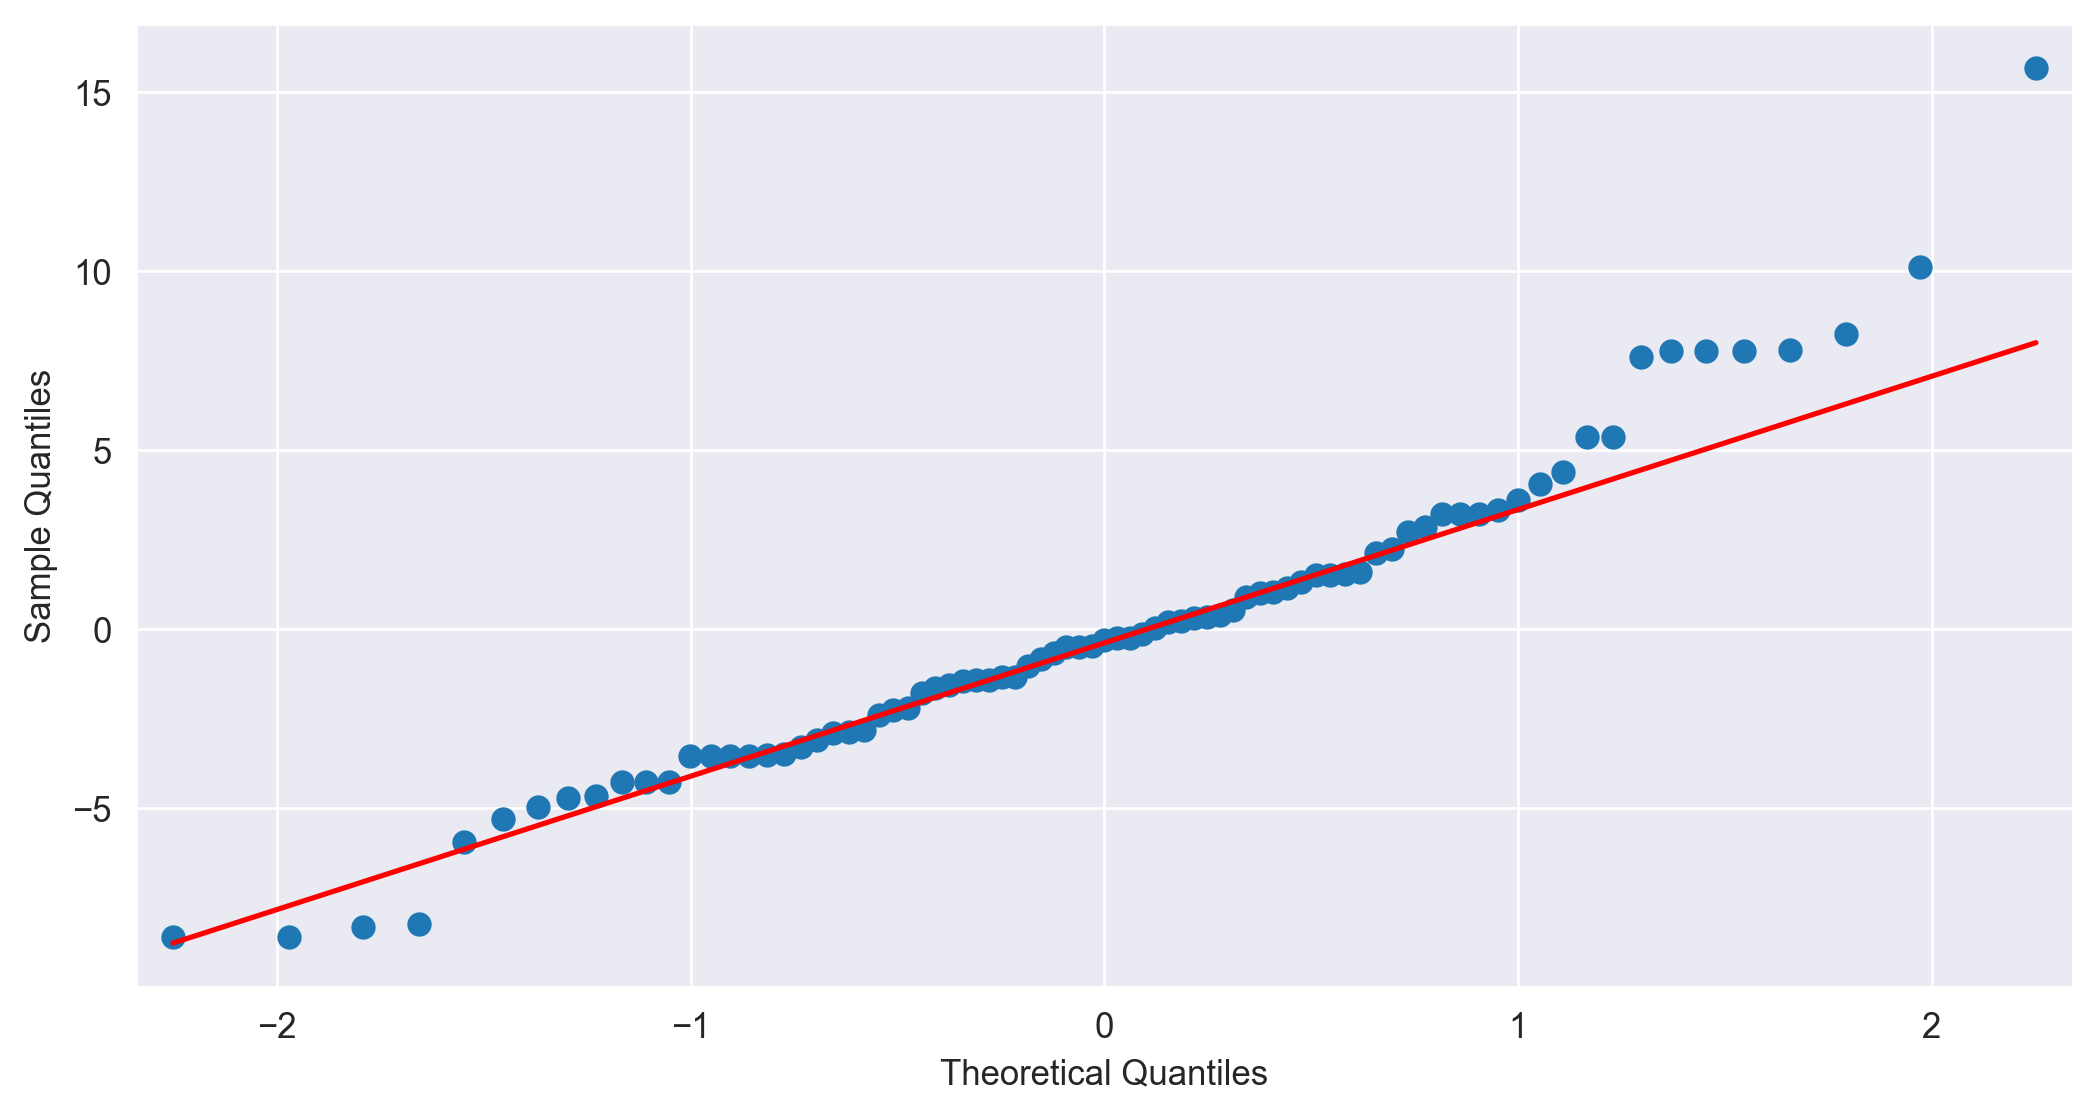

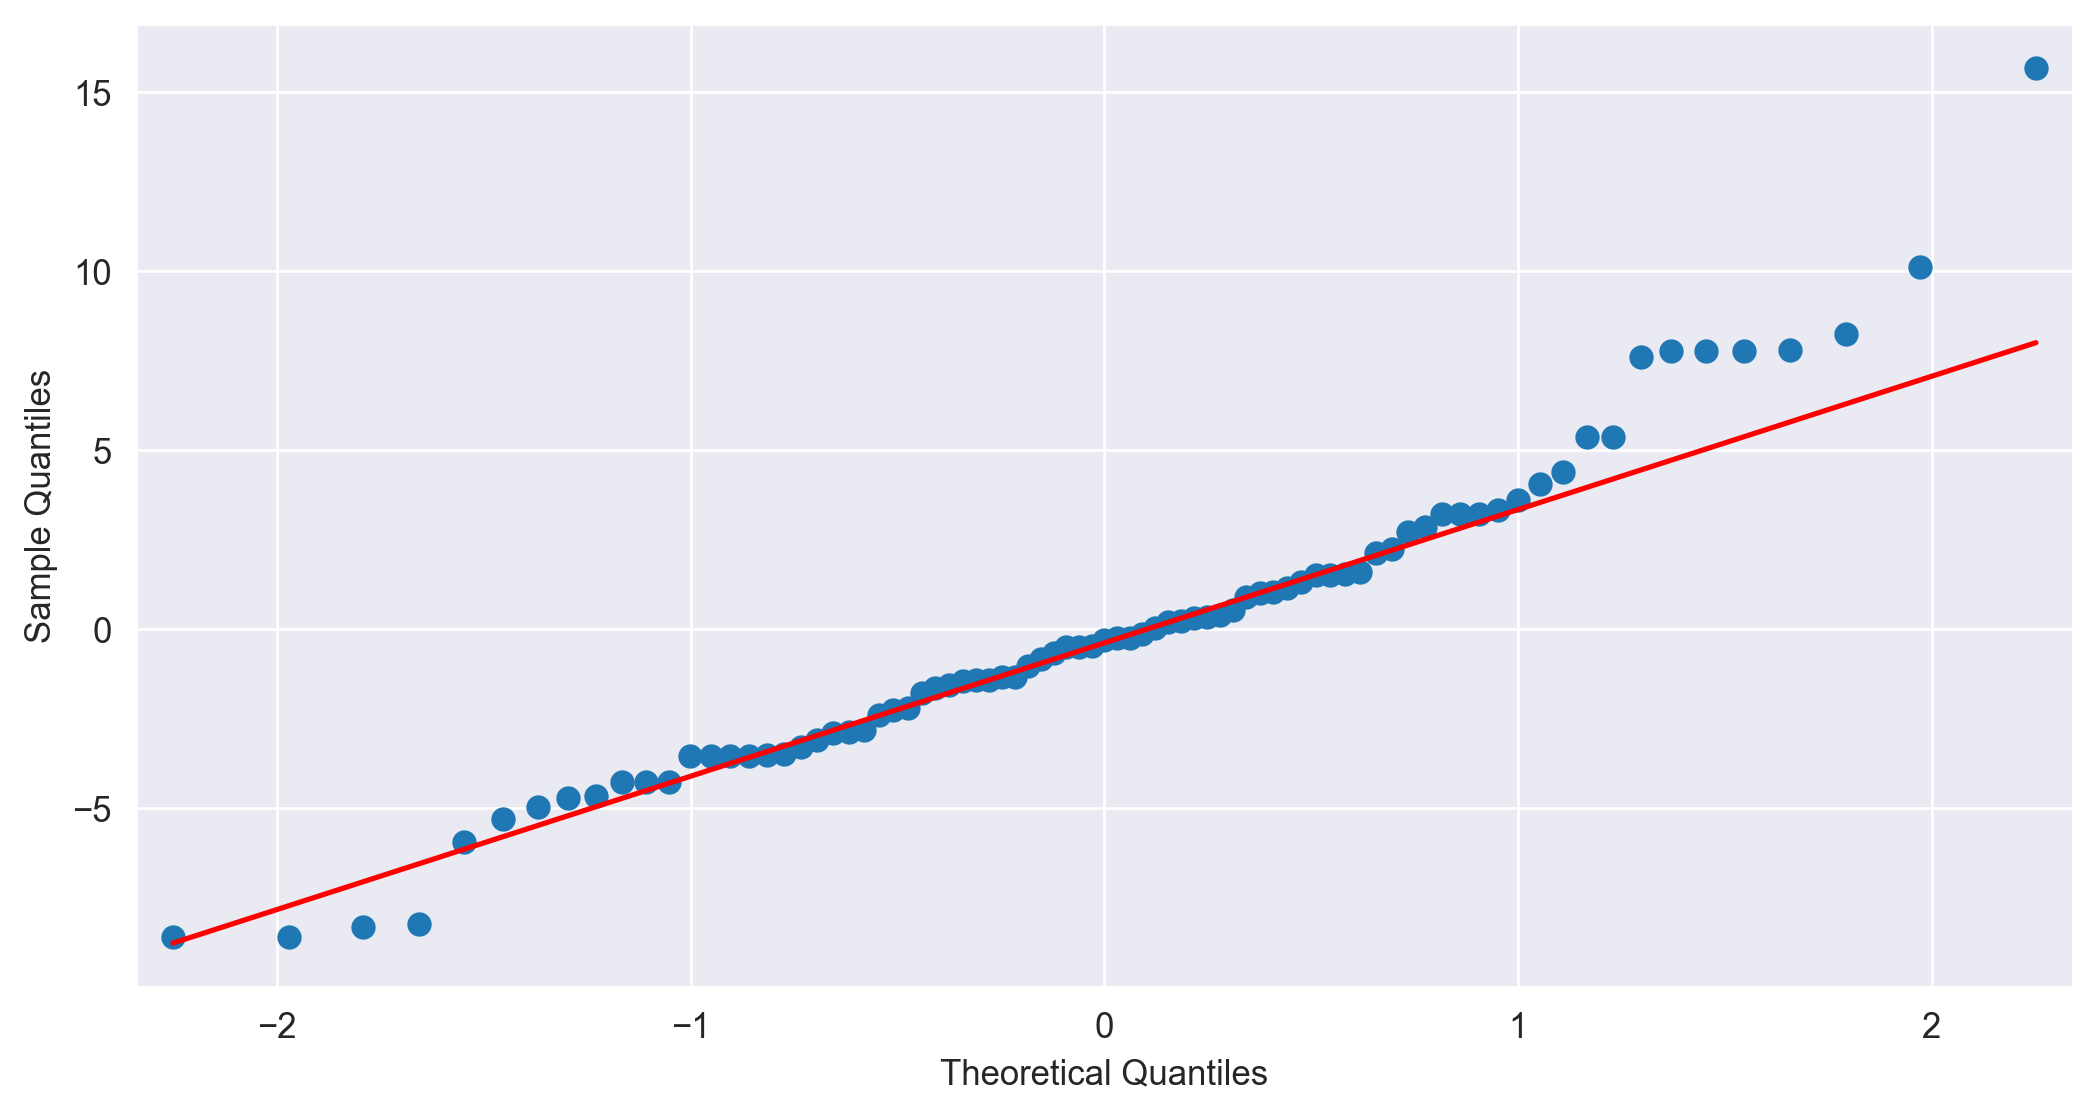

In [27]:
#Q-Q Plot
sm.qqplot(vol.resid, line='q')

In [28]:
#get index for higher residuals
np.where(vol.resid> 10)

(array([ 0, 76], dtype=int64),)

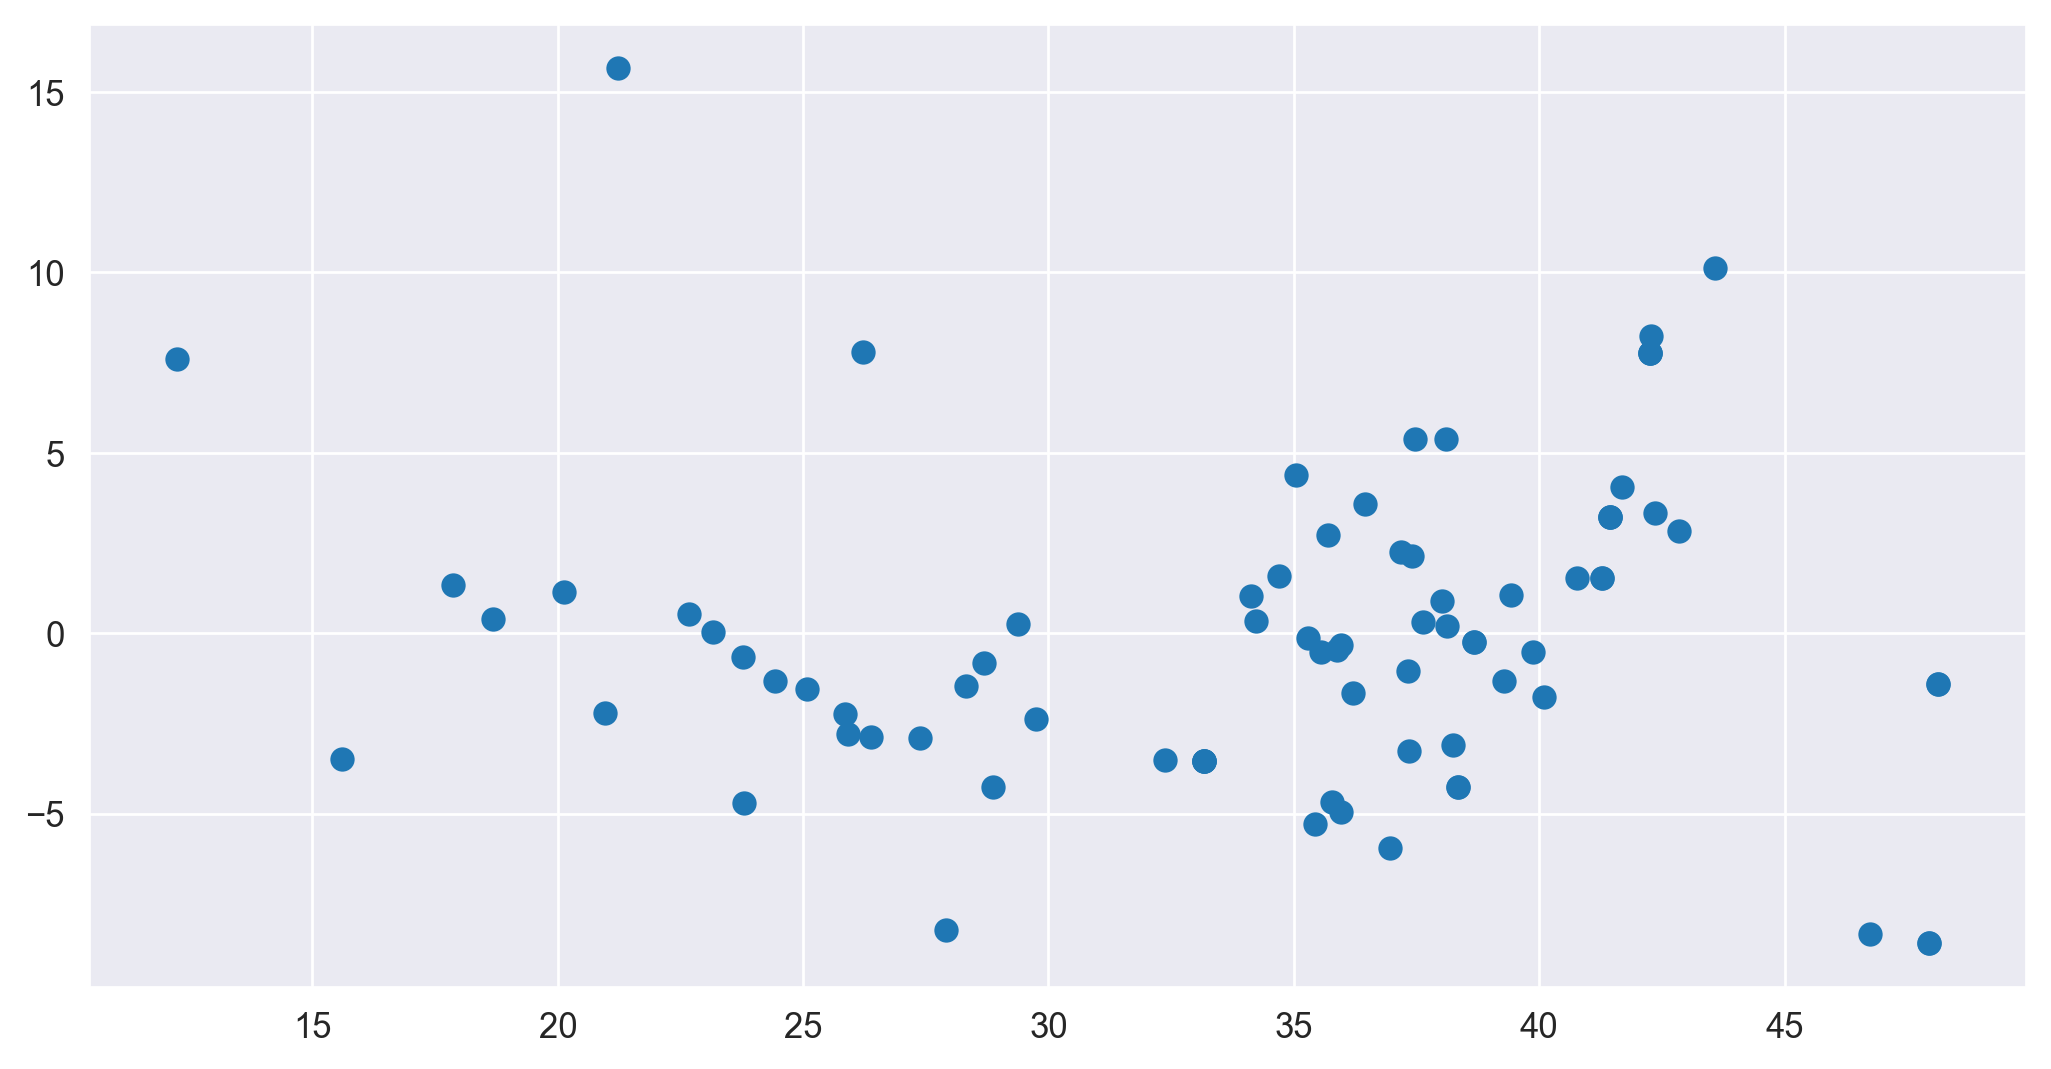

In [29]:
plt.scatter(vol.fittedvalues, vol.resid)

In [30]:
#Residual vs Regressor

eval_env: 1


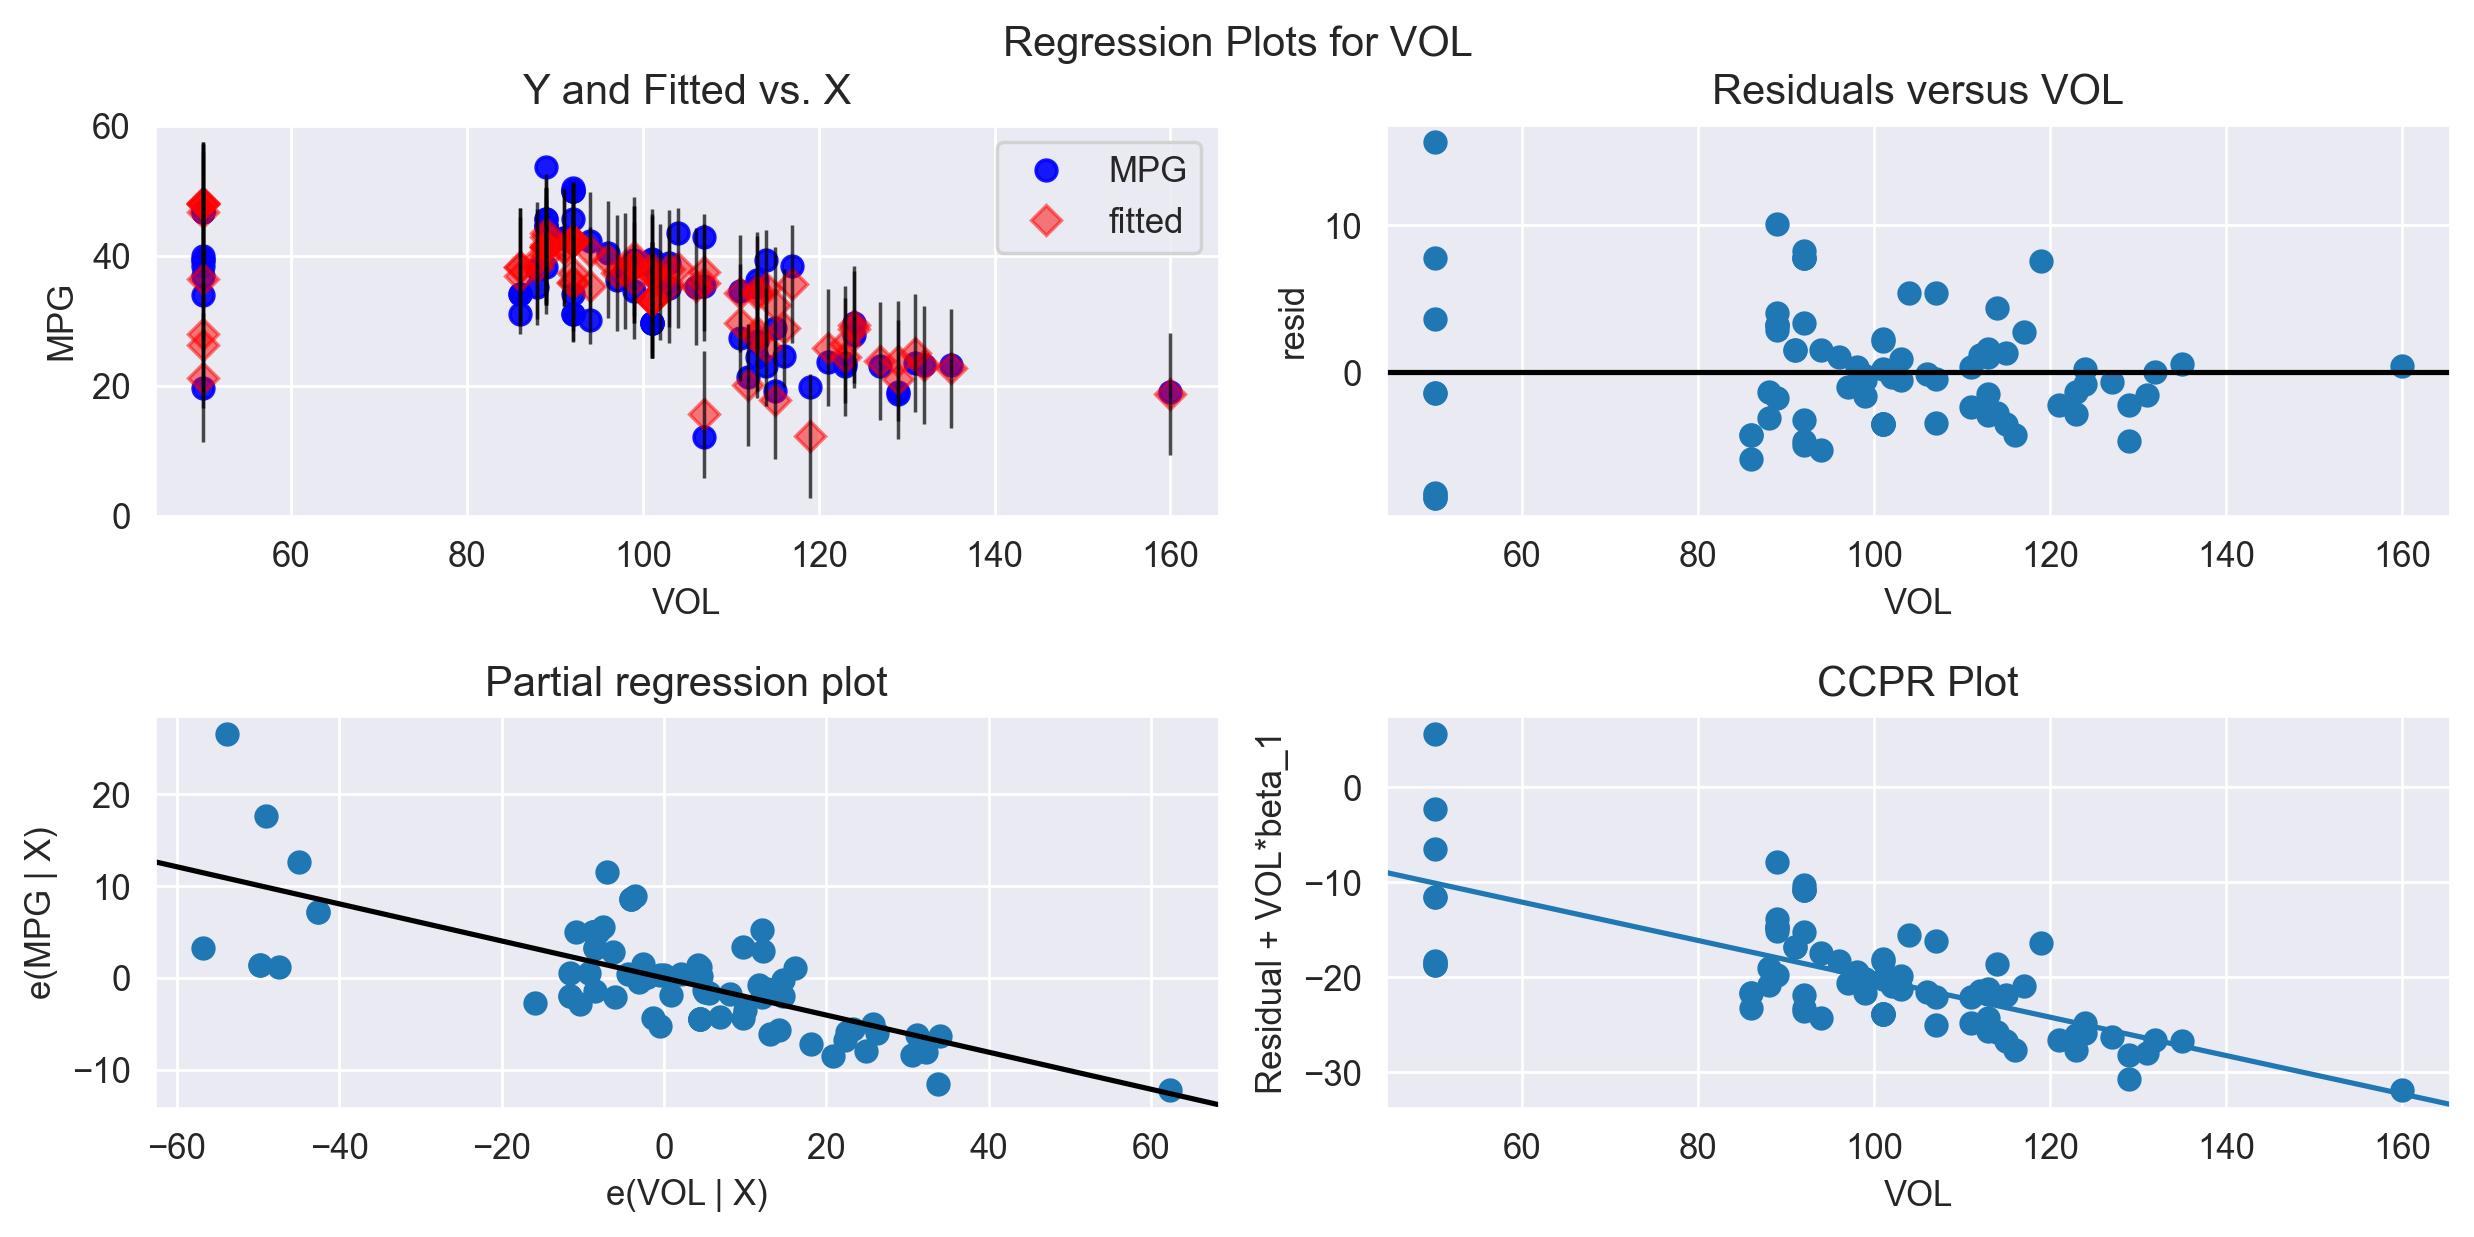

In [31]:
#Vol
sm.graphics.plot_regress_exog(vol,'VOL');

eval_env: 1


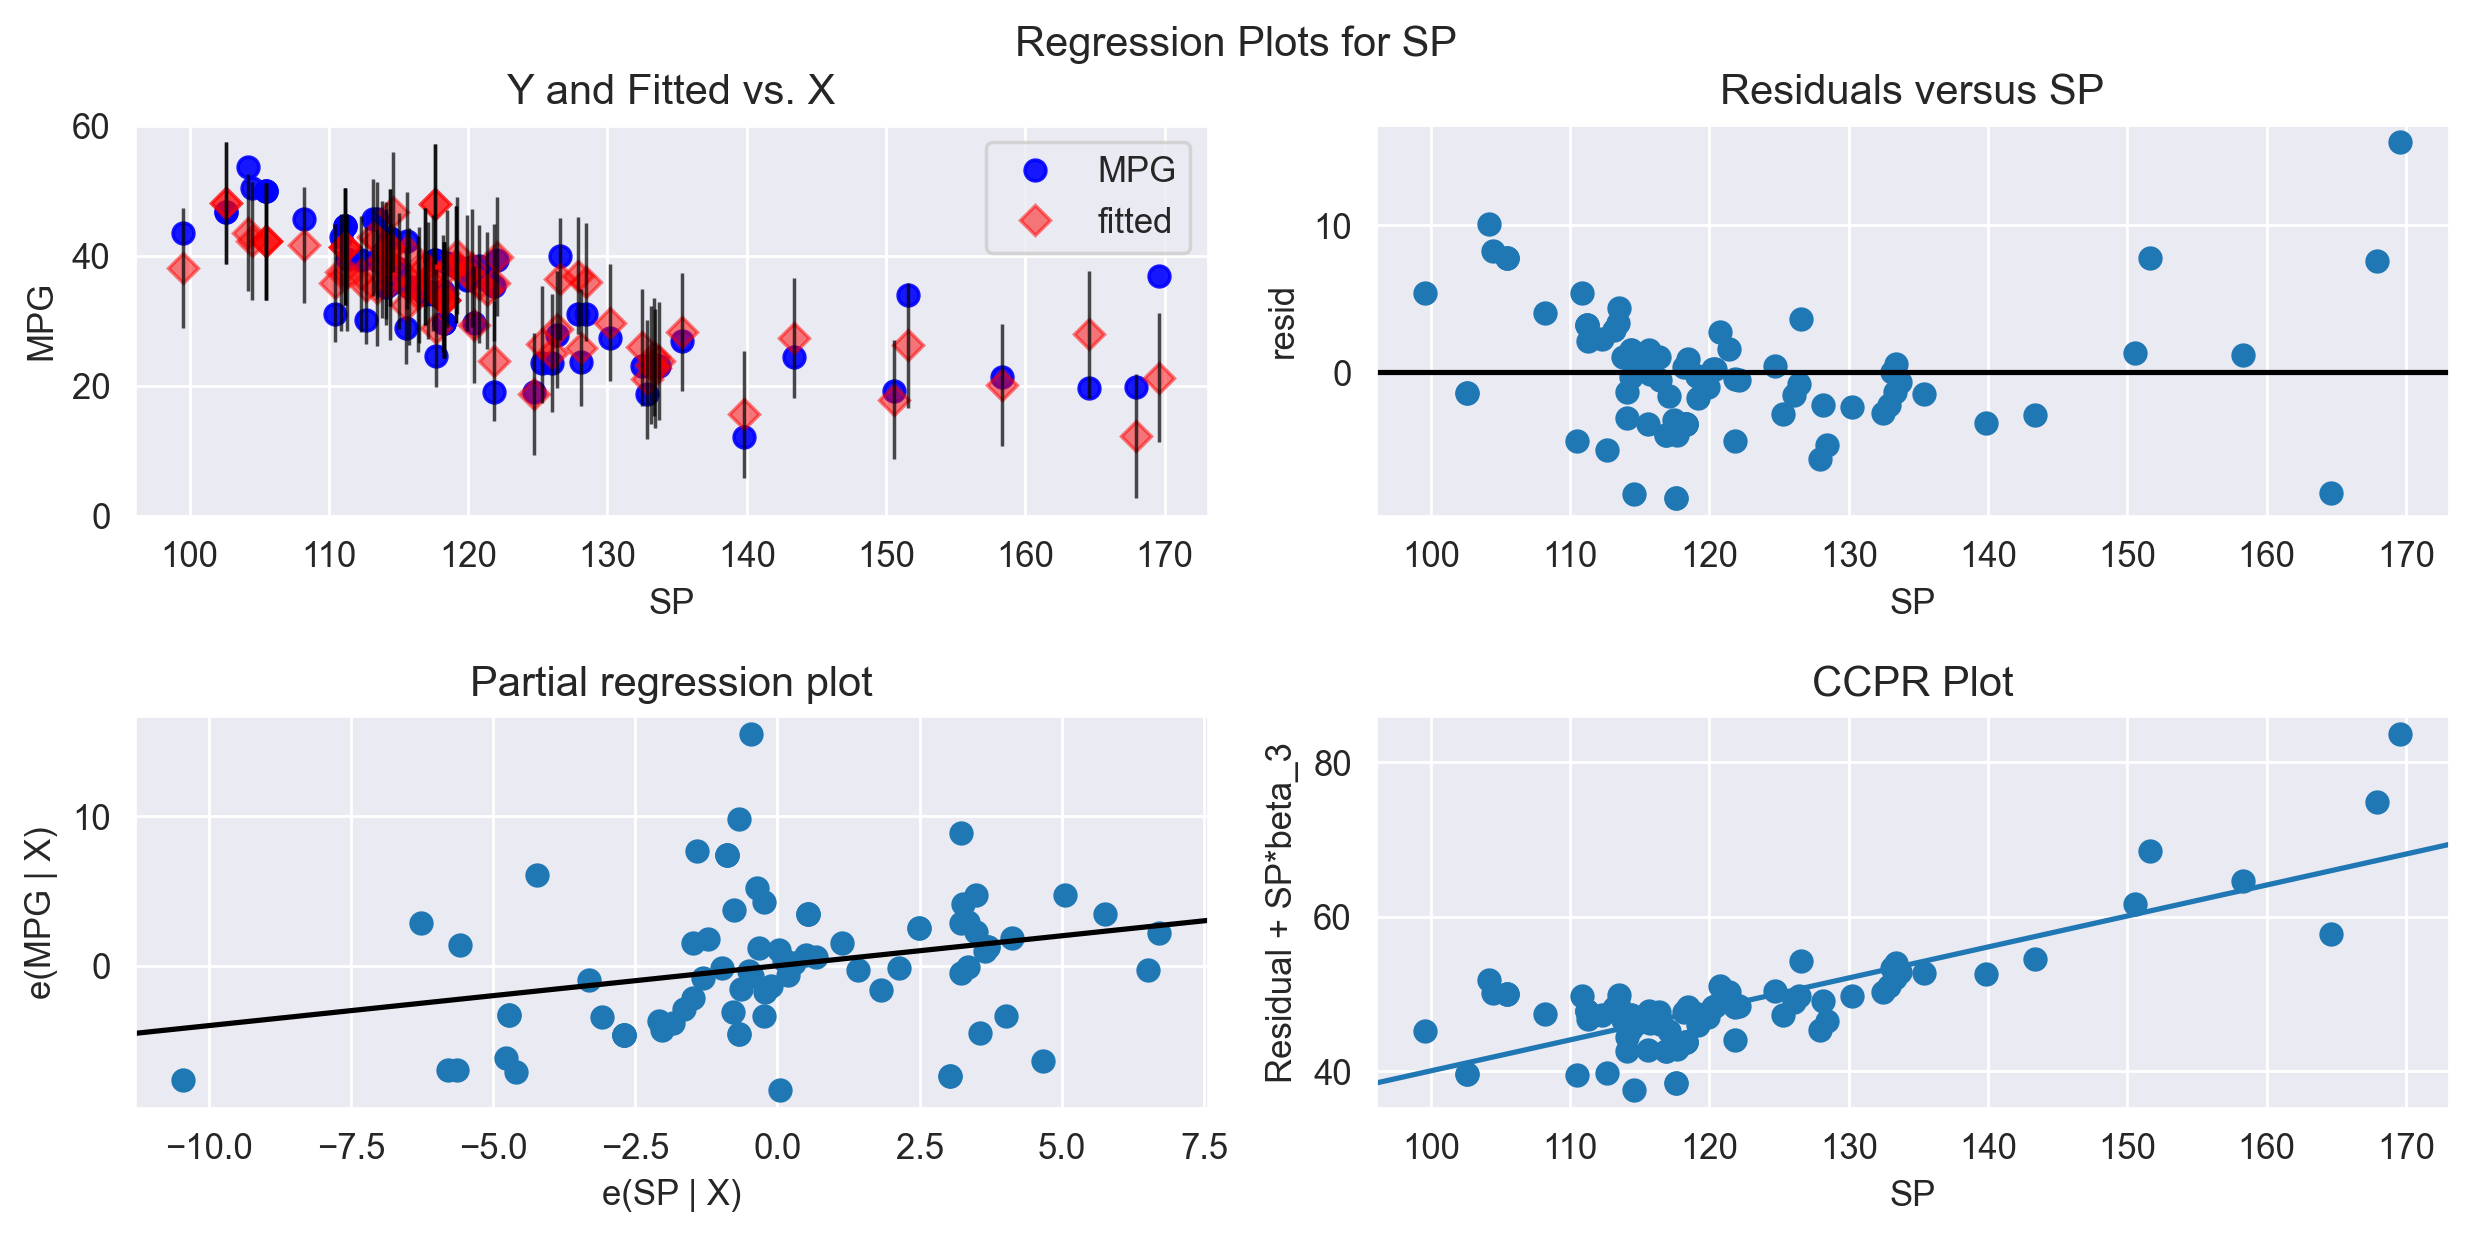

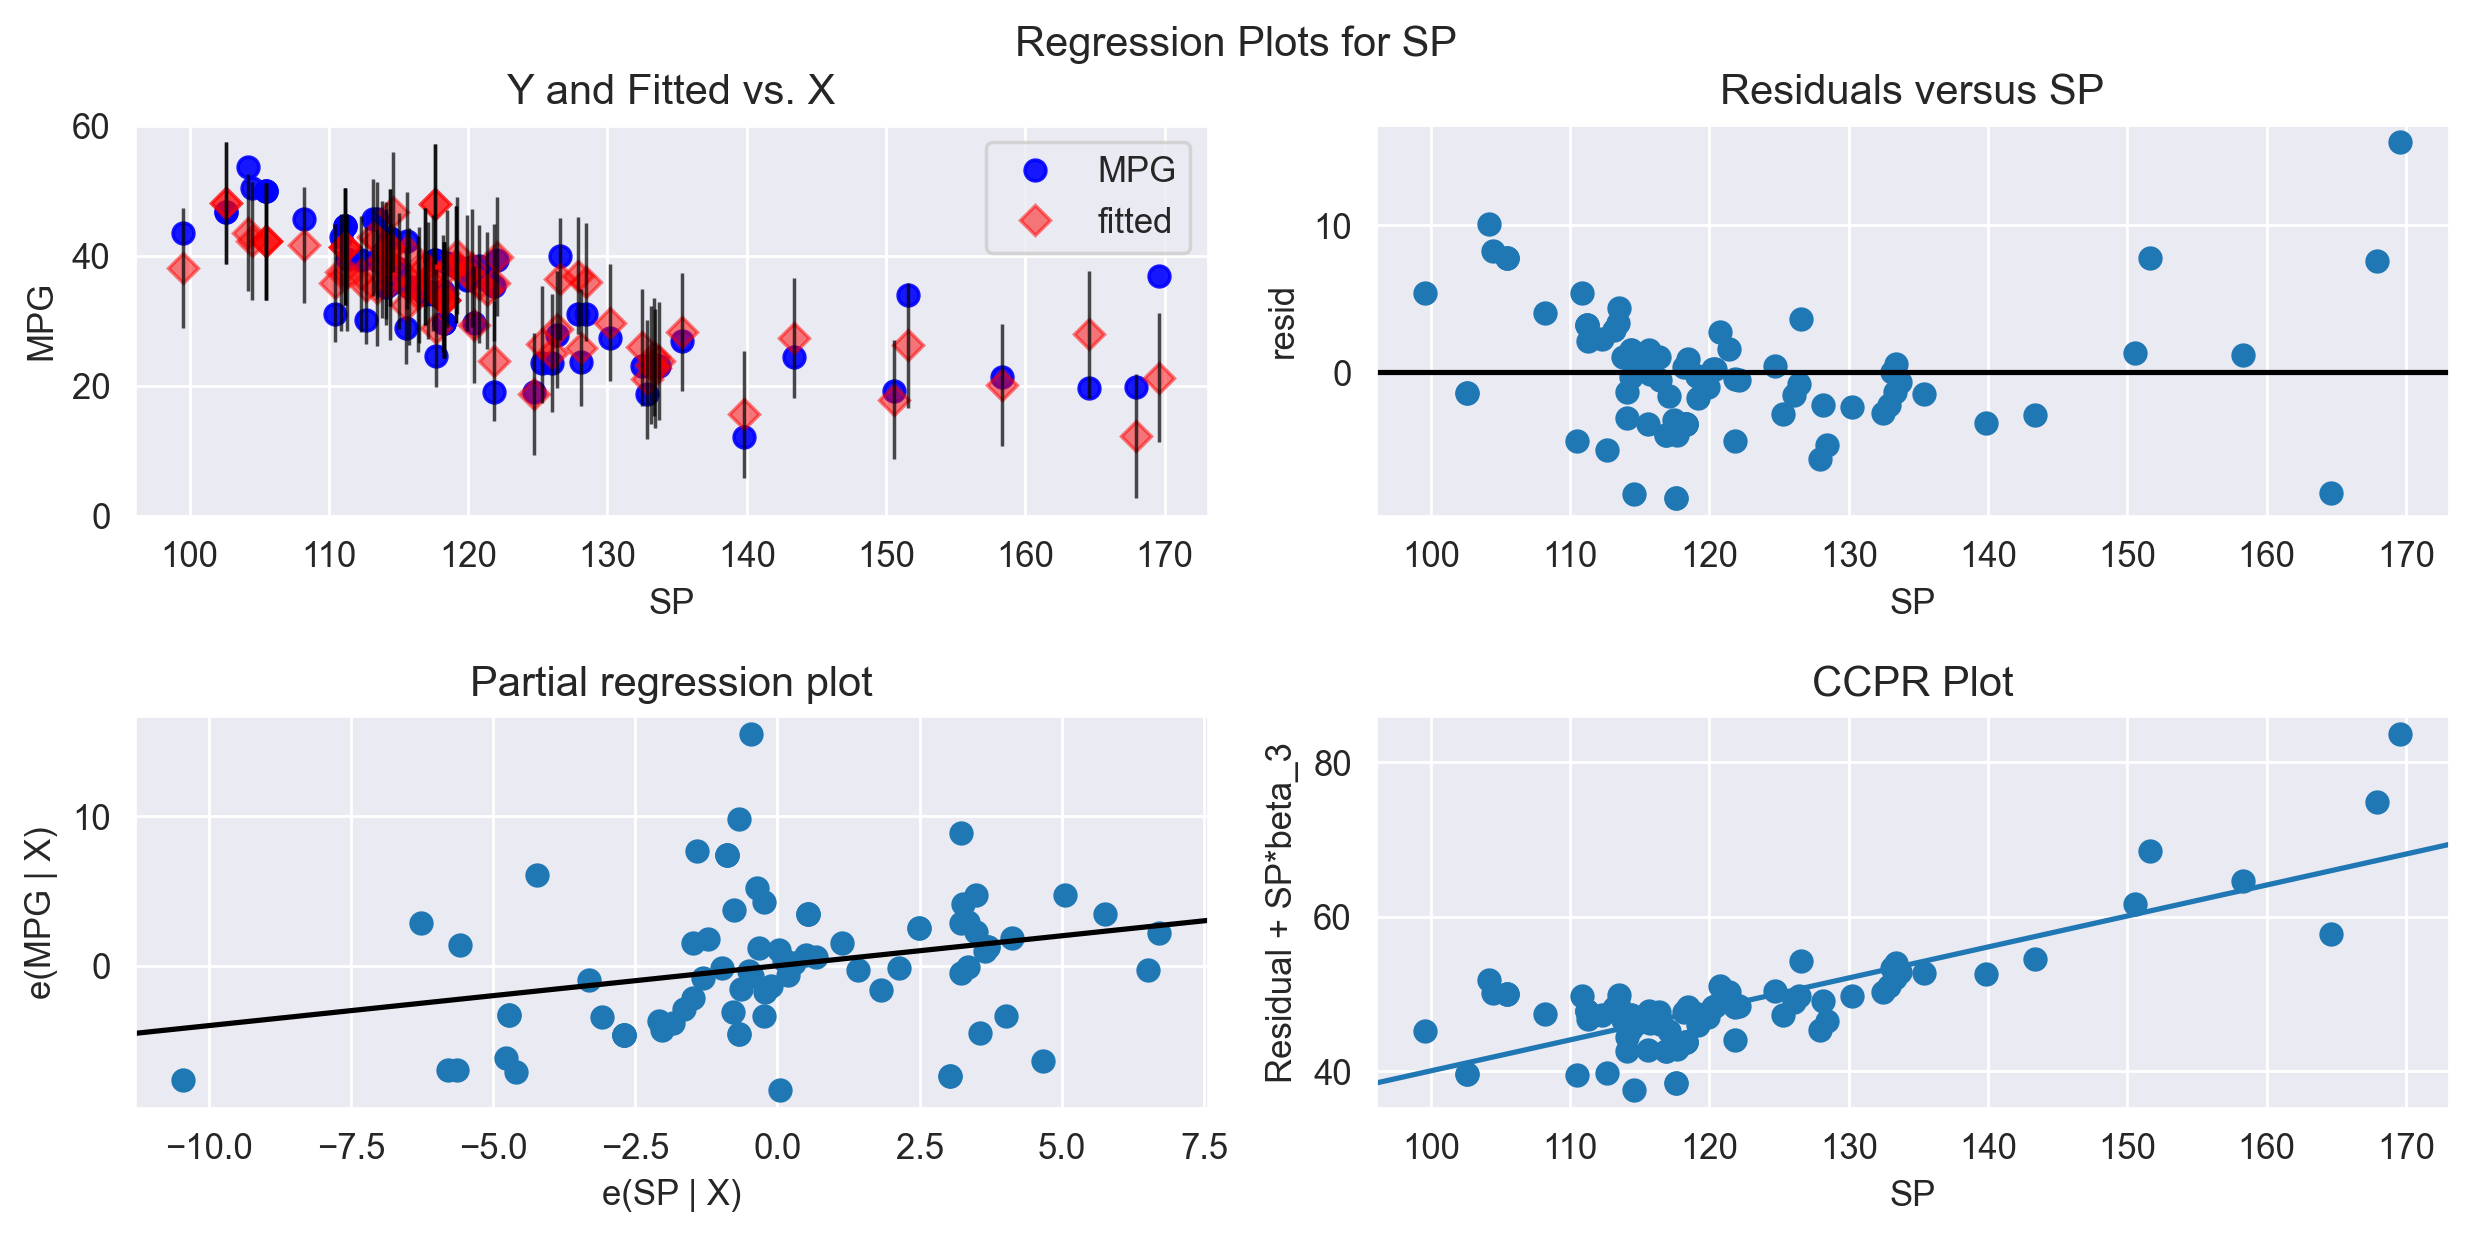

In [32]:
#Sp
sm.graphics.plot_regress_exog(vol,'SP')

eval_env: 1


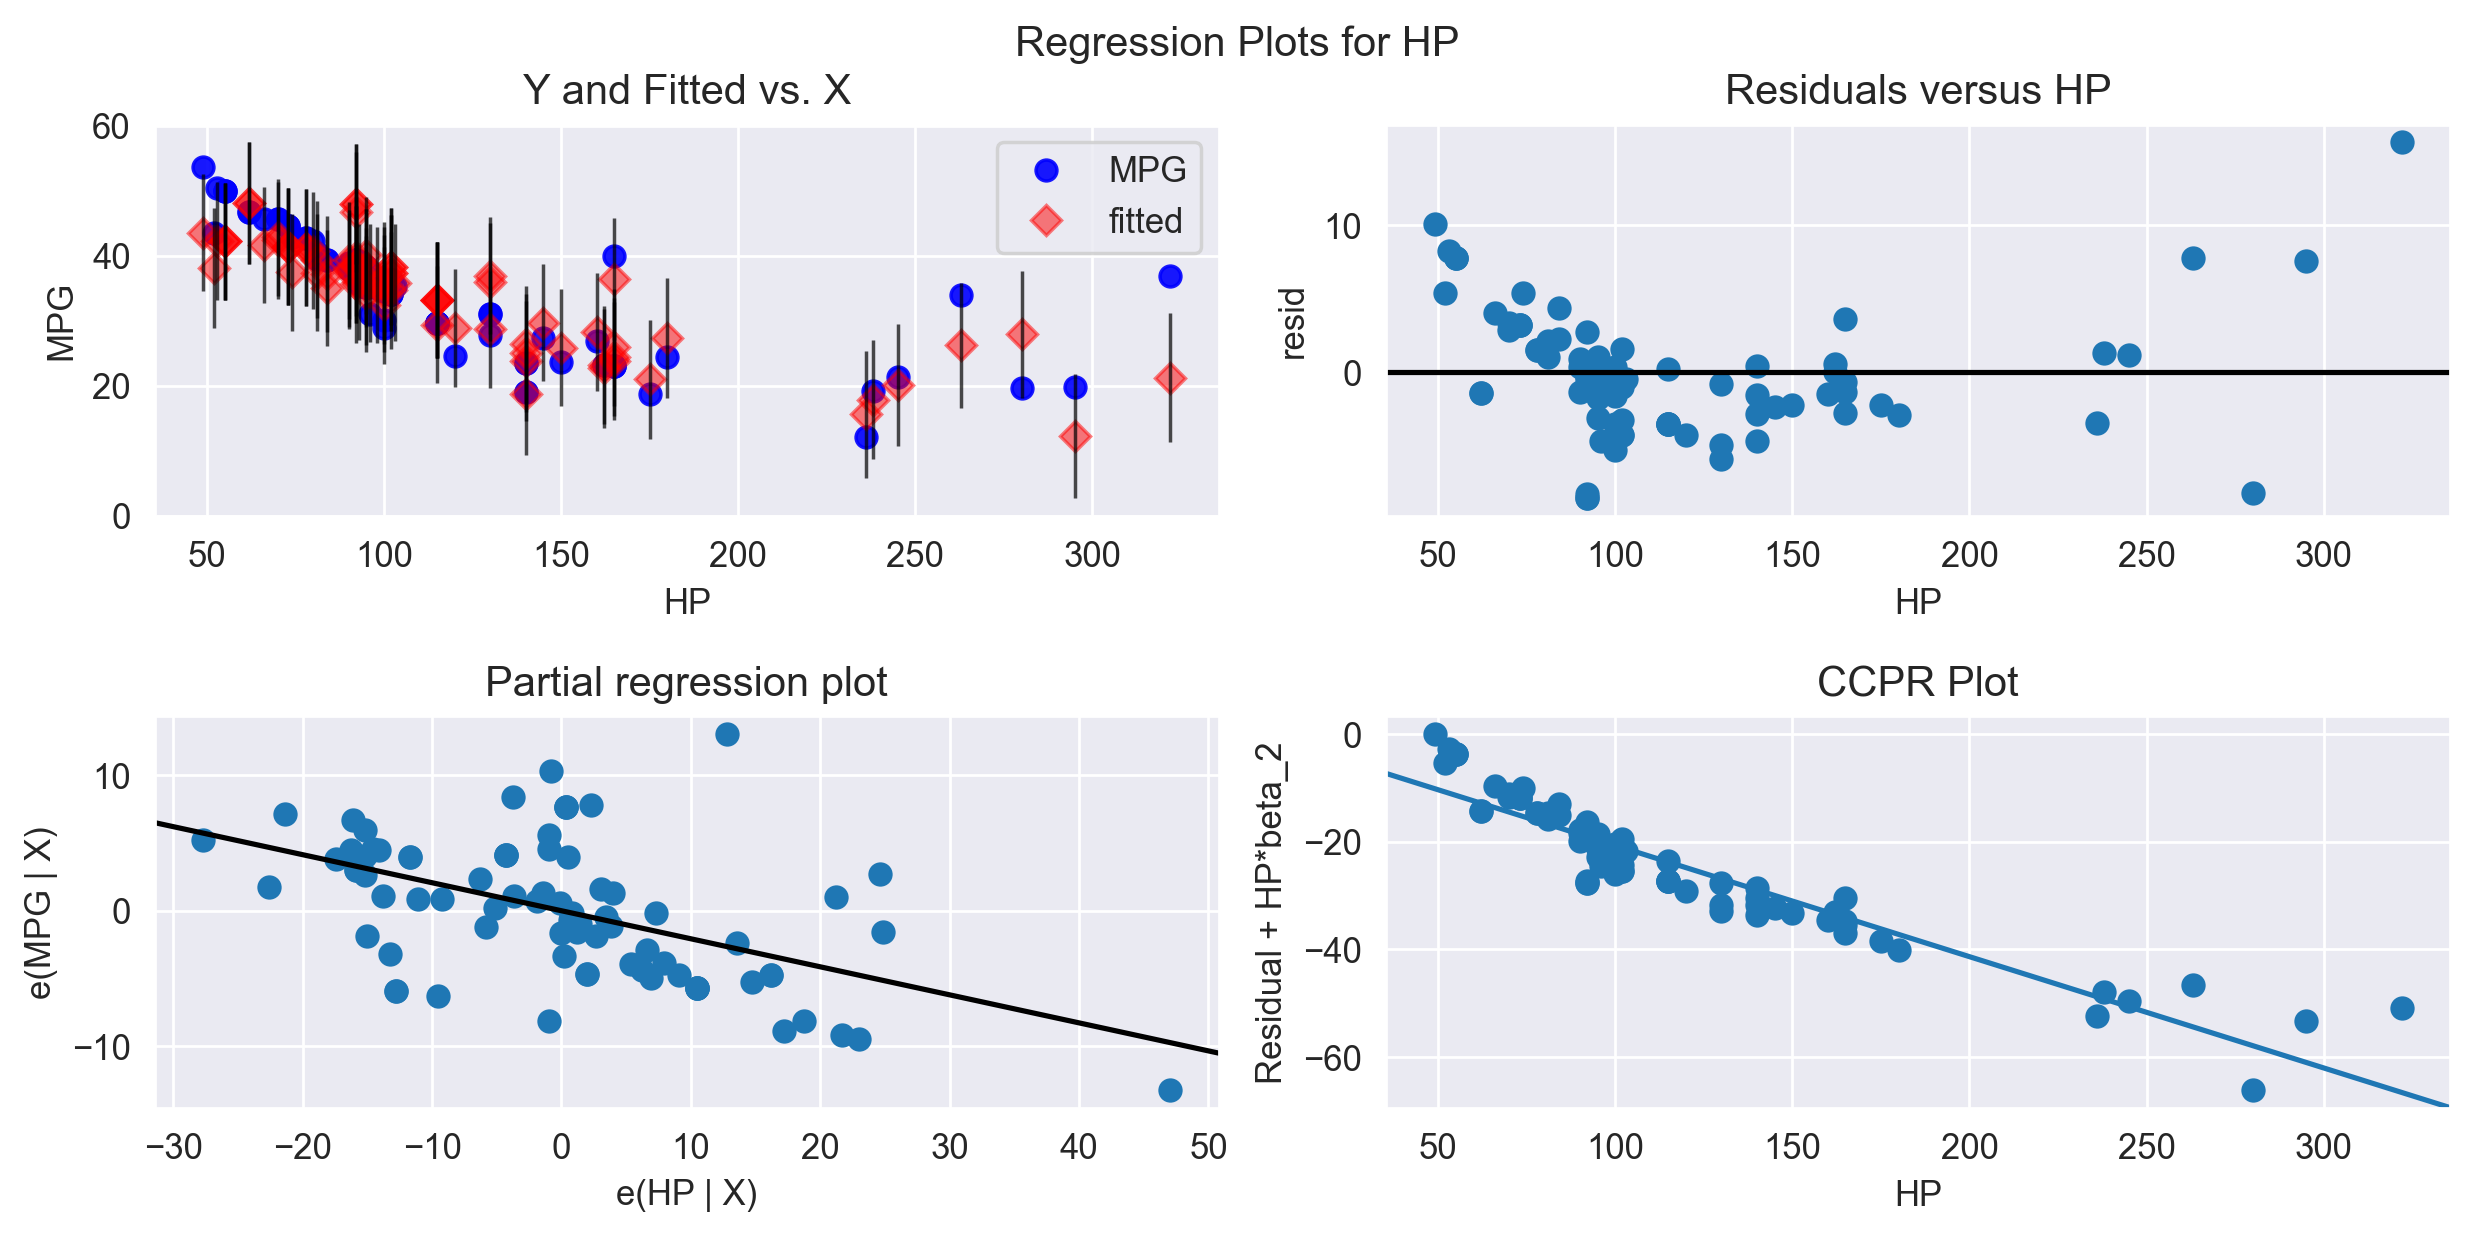

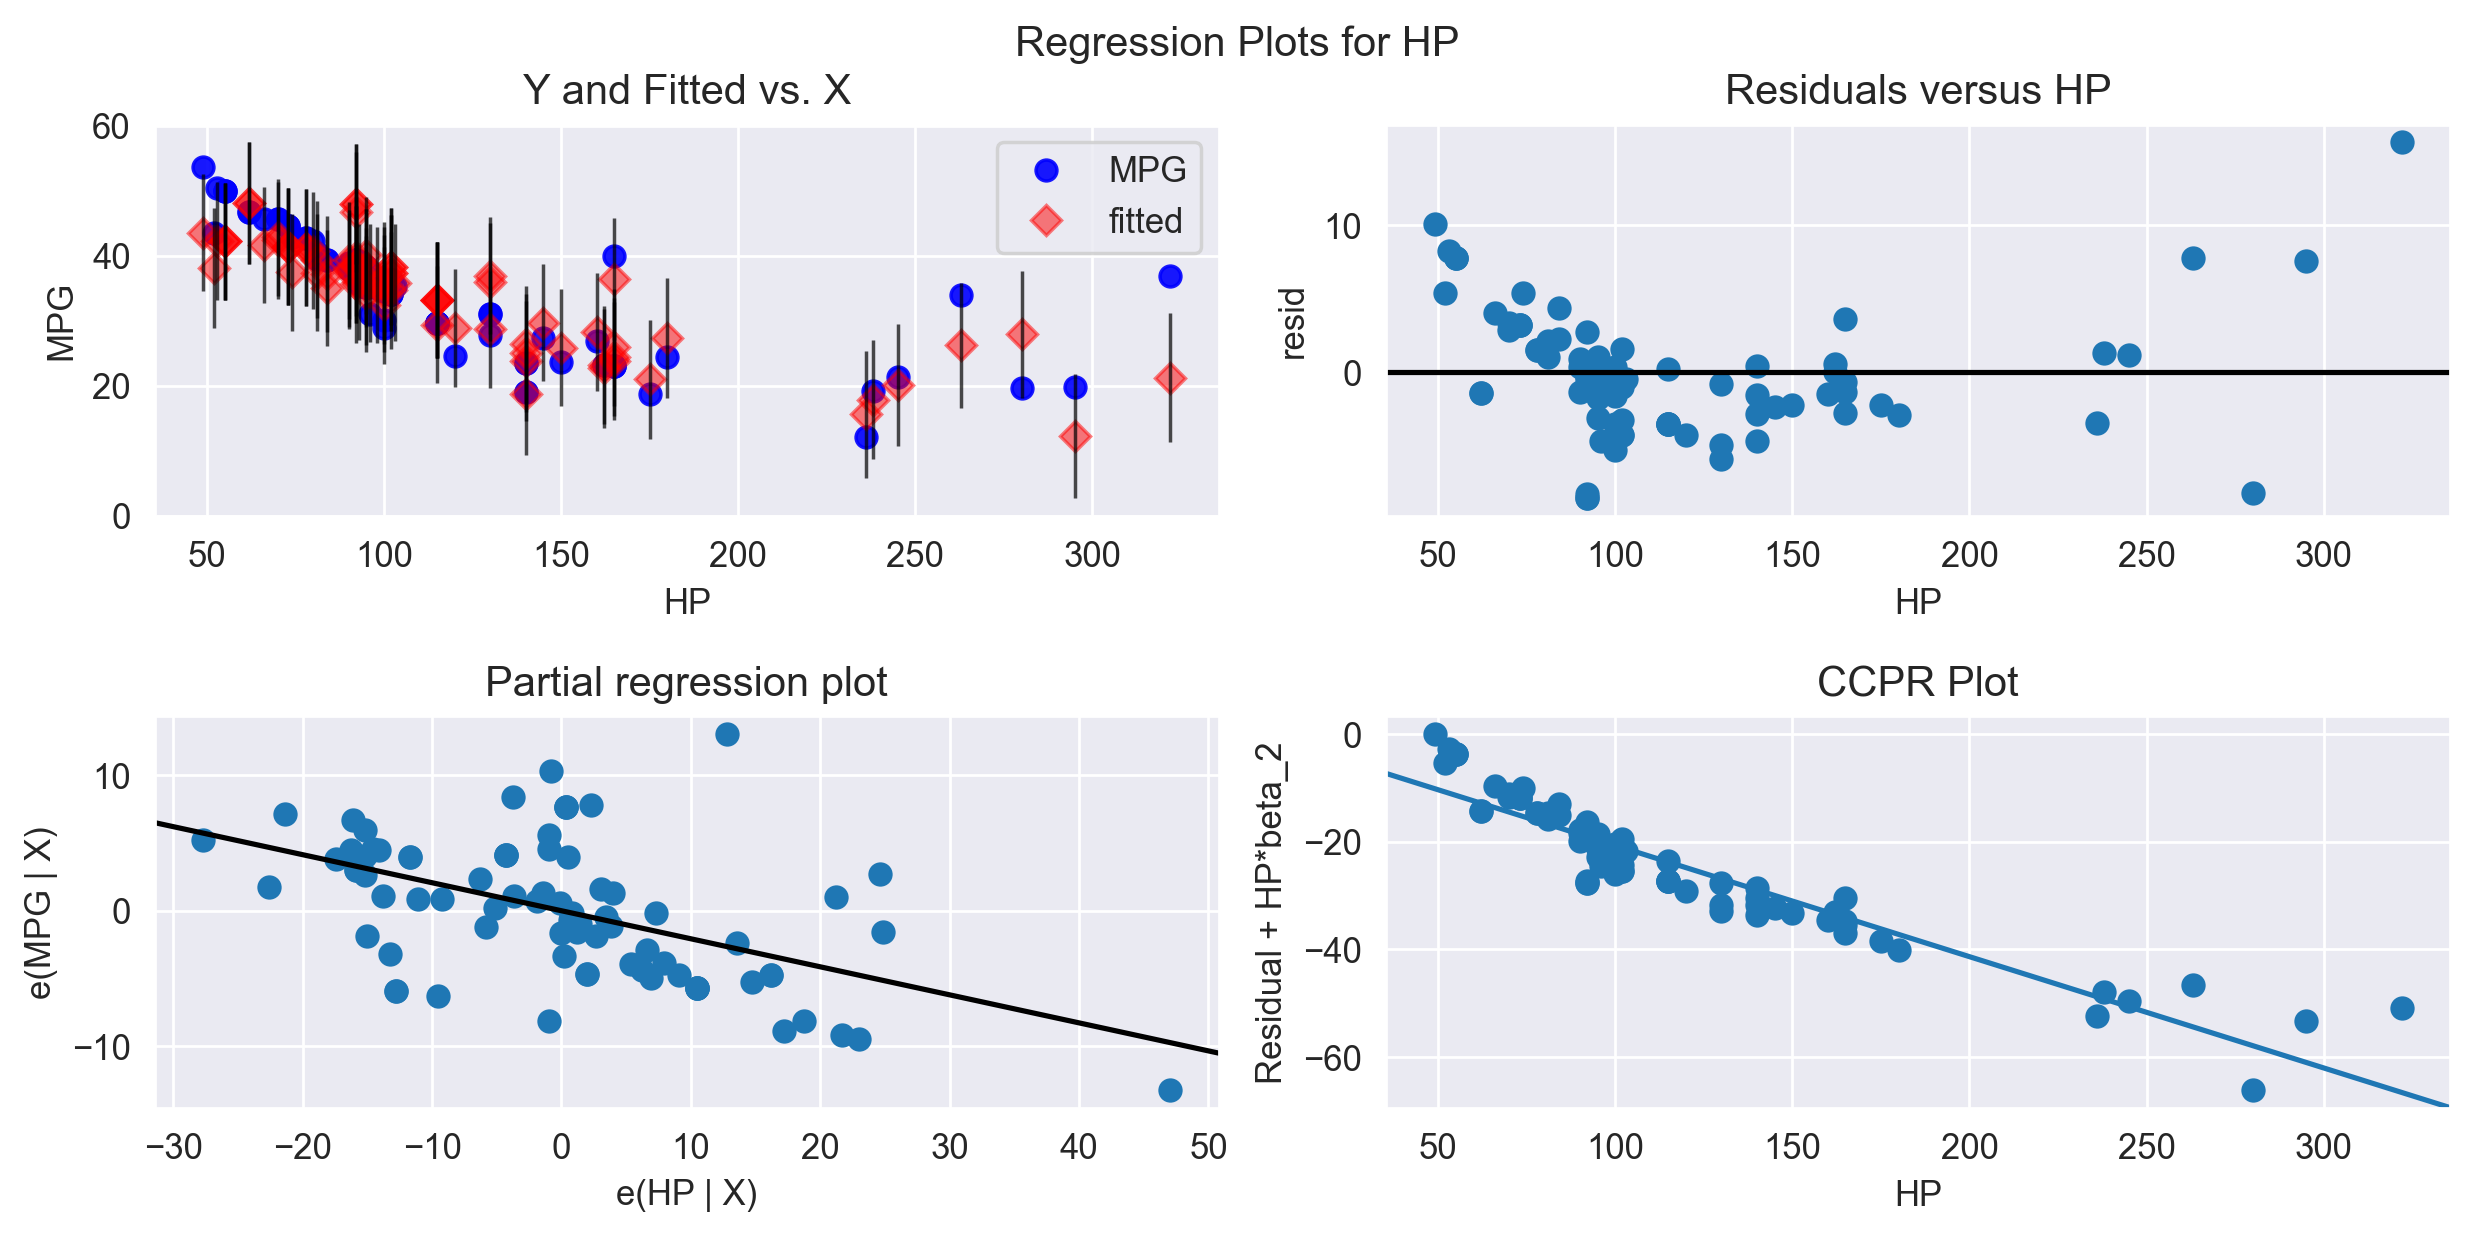

In [33]:
#Hp
sm.graphics.plot_regress_exog(vol,'HP')

Model Deletion Techniques

In [34]:
#Cooks Distance

In [35]:
model= smf.ols('MPG~VOL+SP+HP', data=df).fit()

In [36]:
inf= model.get_influence()
c,p= inf.cooks_distance

In [37]:
c

array([4.43781421e-02, 2.31439849e-02, 2.31439849e-02, 5.50743307e-03,
       2.84029117e-02, 3.89961849e-03, 2.31439849e-02, 3.39659293e-03,
       3.39659293e-03, 9.67532550e-04, 3.00465895e-03, 9.32152031e-02,
       2.65177317e-04, 3.00465895e-03, 5.41784561e-03, 3.00465895e-03,
       8.22731925e-04, 9.32152031e-02, 8.22731925e-04, 3.21833541e-04,
       2.70620733e-05, 8.34770054e-03, 1.83348025e-05, 2.72860299e-04,
       1.23307010e-03, 7.41312614e-02, 5.71759163e-03, 2.70620733e-05,
       3.33387970e-02, 9.21393948e-05, 5.93913831e-03, 1.23367282e-03,
       2.67864467e-04, 1.10555542e-03, 1.21312479e-03, 2.01774924e-05,
       4.19374936e-04, 4.18657710e-03, 4.18657710e-03, 1.12077324e-02,
       2.70424384e-04, 3.80042521e-06, 1.99290460e-03, 2.64674273e-03,
       2.22196543e-05, 4.76293133e-04, 2.58868946e-05, 4.92204073e-05,
       1.55796817e-02, 3.53143210e-03, 3.53143210e-03, 3.53143210e-03,
       2.30754944e-05, 1.04055062e-02, 1.07199598e-03, 2.89811901e-04,
      

<StemContainer object of 3 artists>

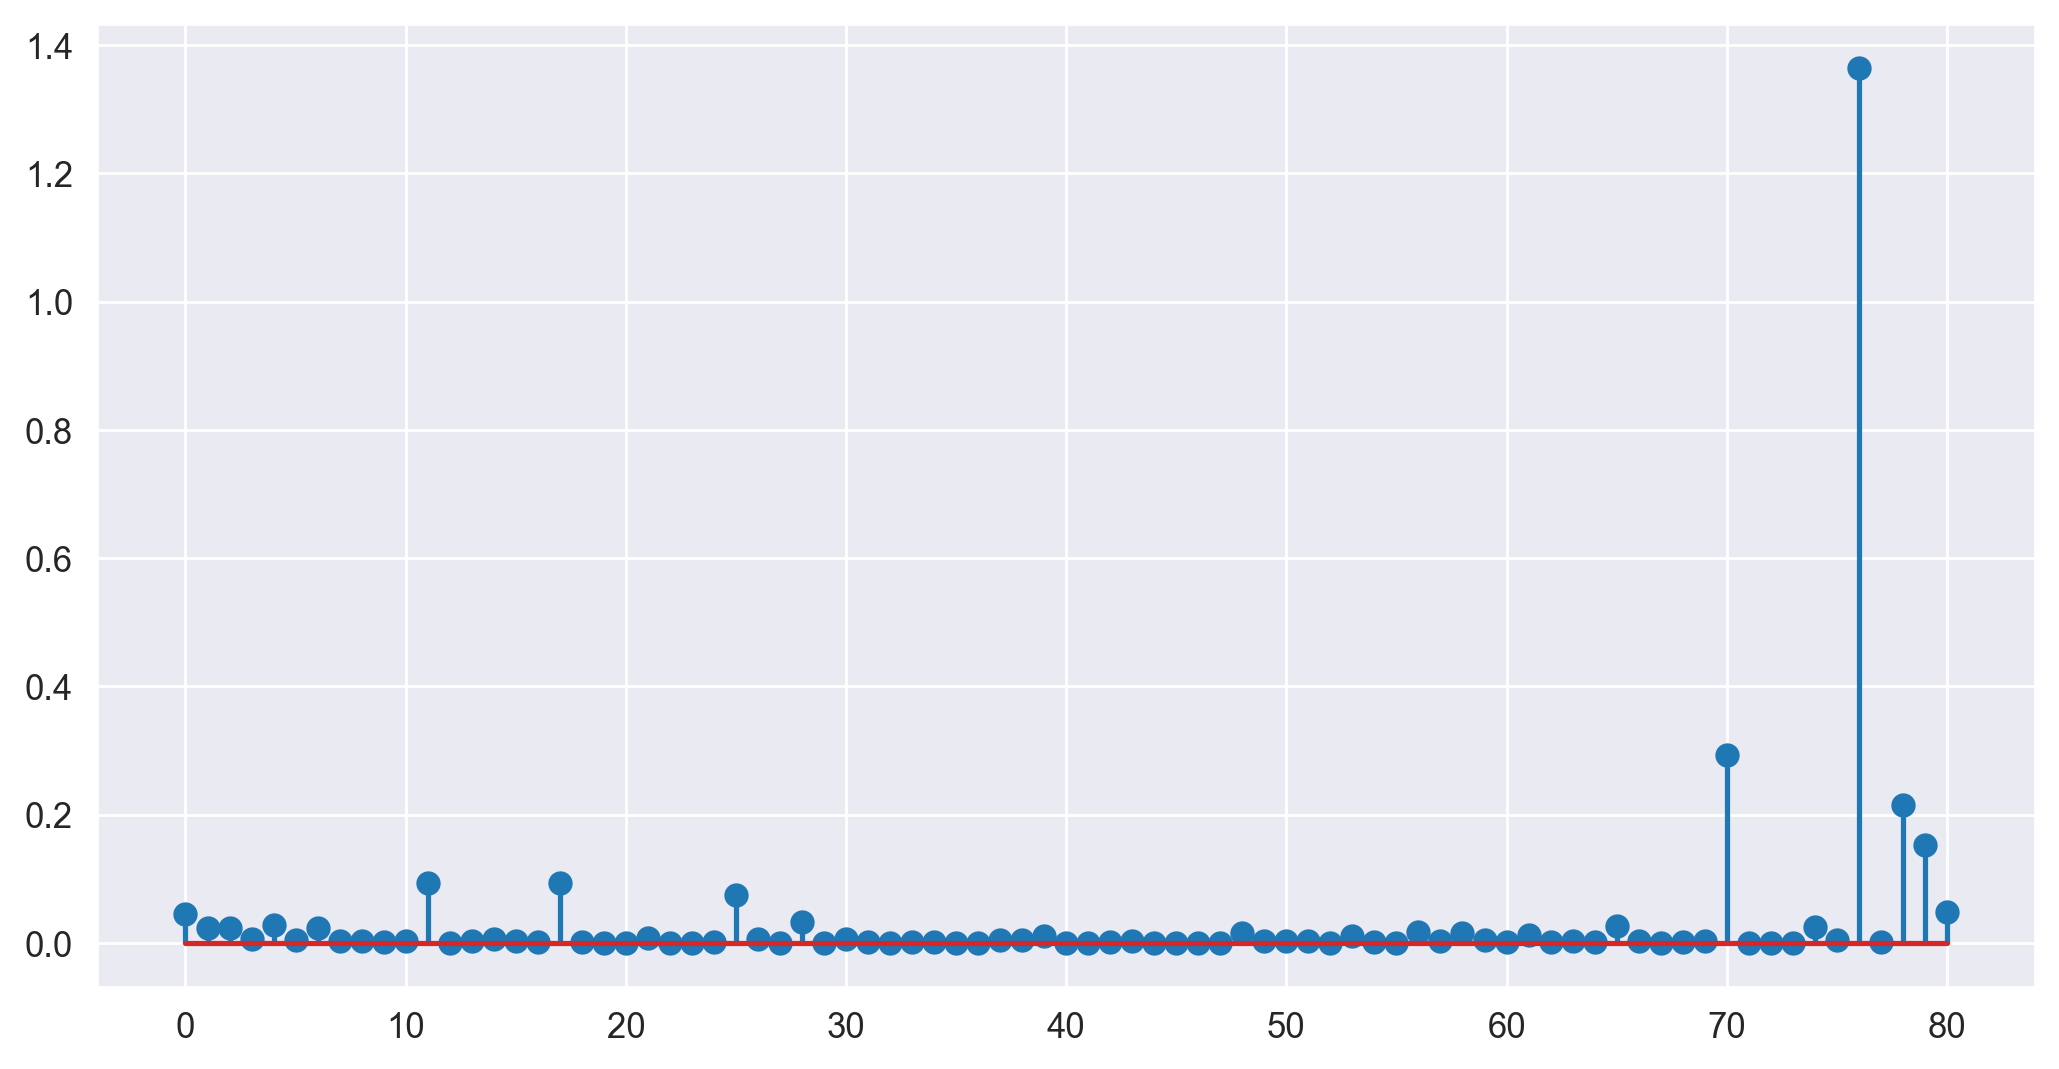

In [38]:
#Cooks Distance Plot
plt.stem(c)

In [39]:
np.argmax(c), np.max(c)

(76, 1.3641743869103446)

In [40]:
df.iloc[[76]]

,HP,MPG,VOL,SP,WT
76,322,36.9,50,169.598513,16.132947


In [41]:
#Influence plot
from statsmodels.graphics.regressionplots import influence_plot

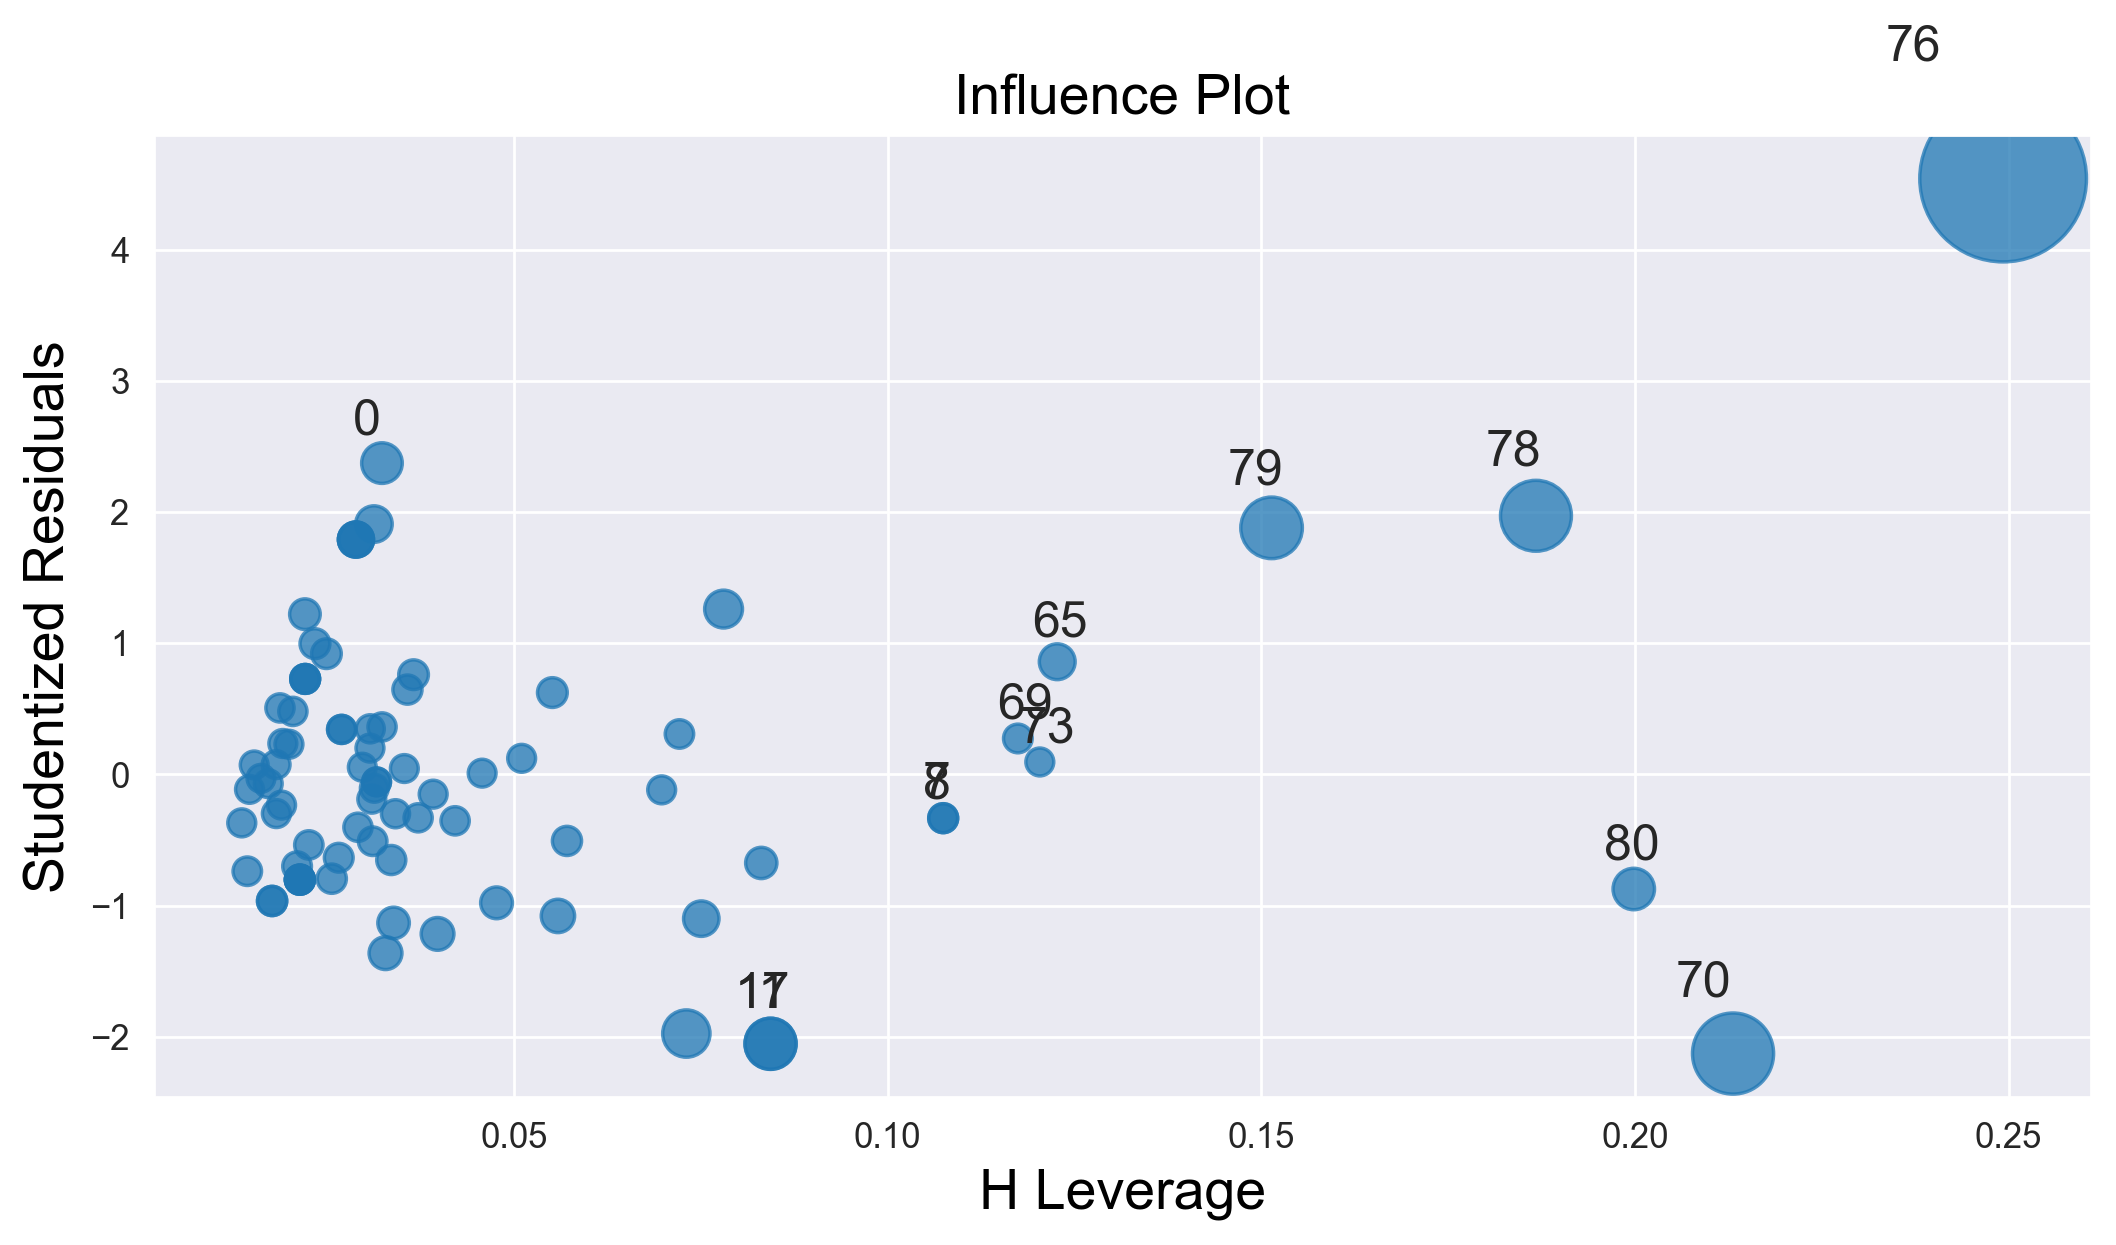

In [42]:
influence_plot(model);

In [43]:
#Calculate cutoff
k= len(df.columns)
n= len(df)

levarge_cutoff= 3*(k+1)/n
levarge_cutoff

0.2222222222222222

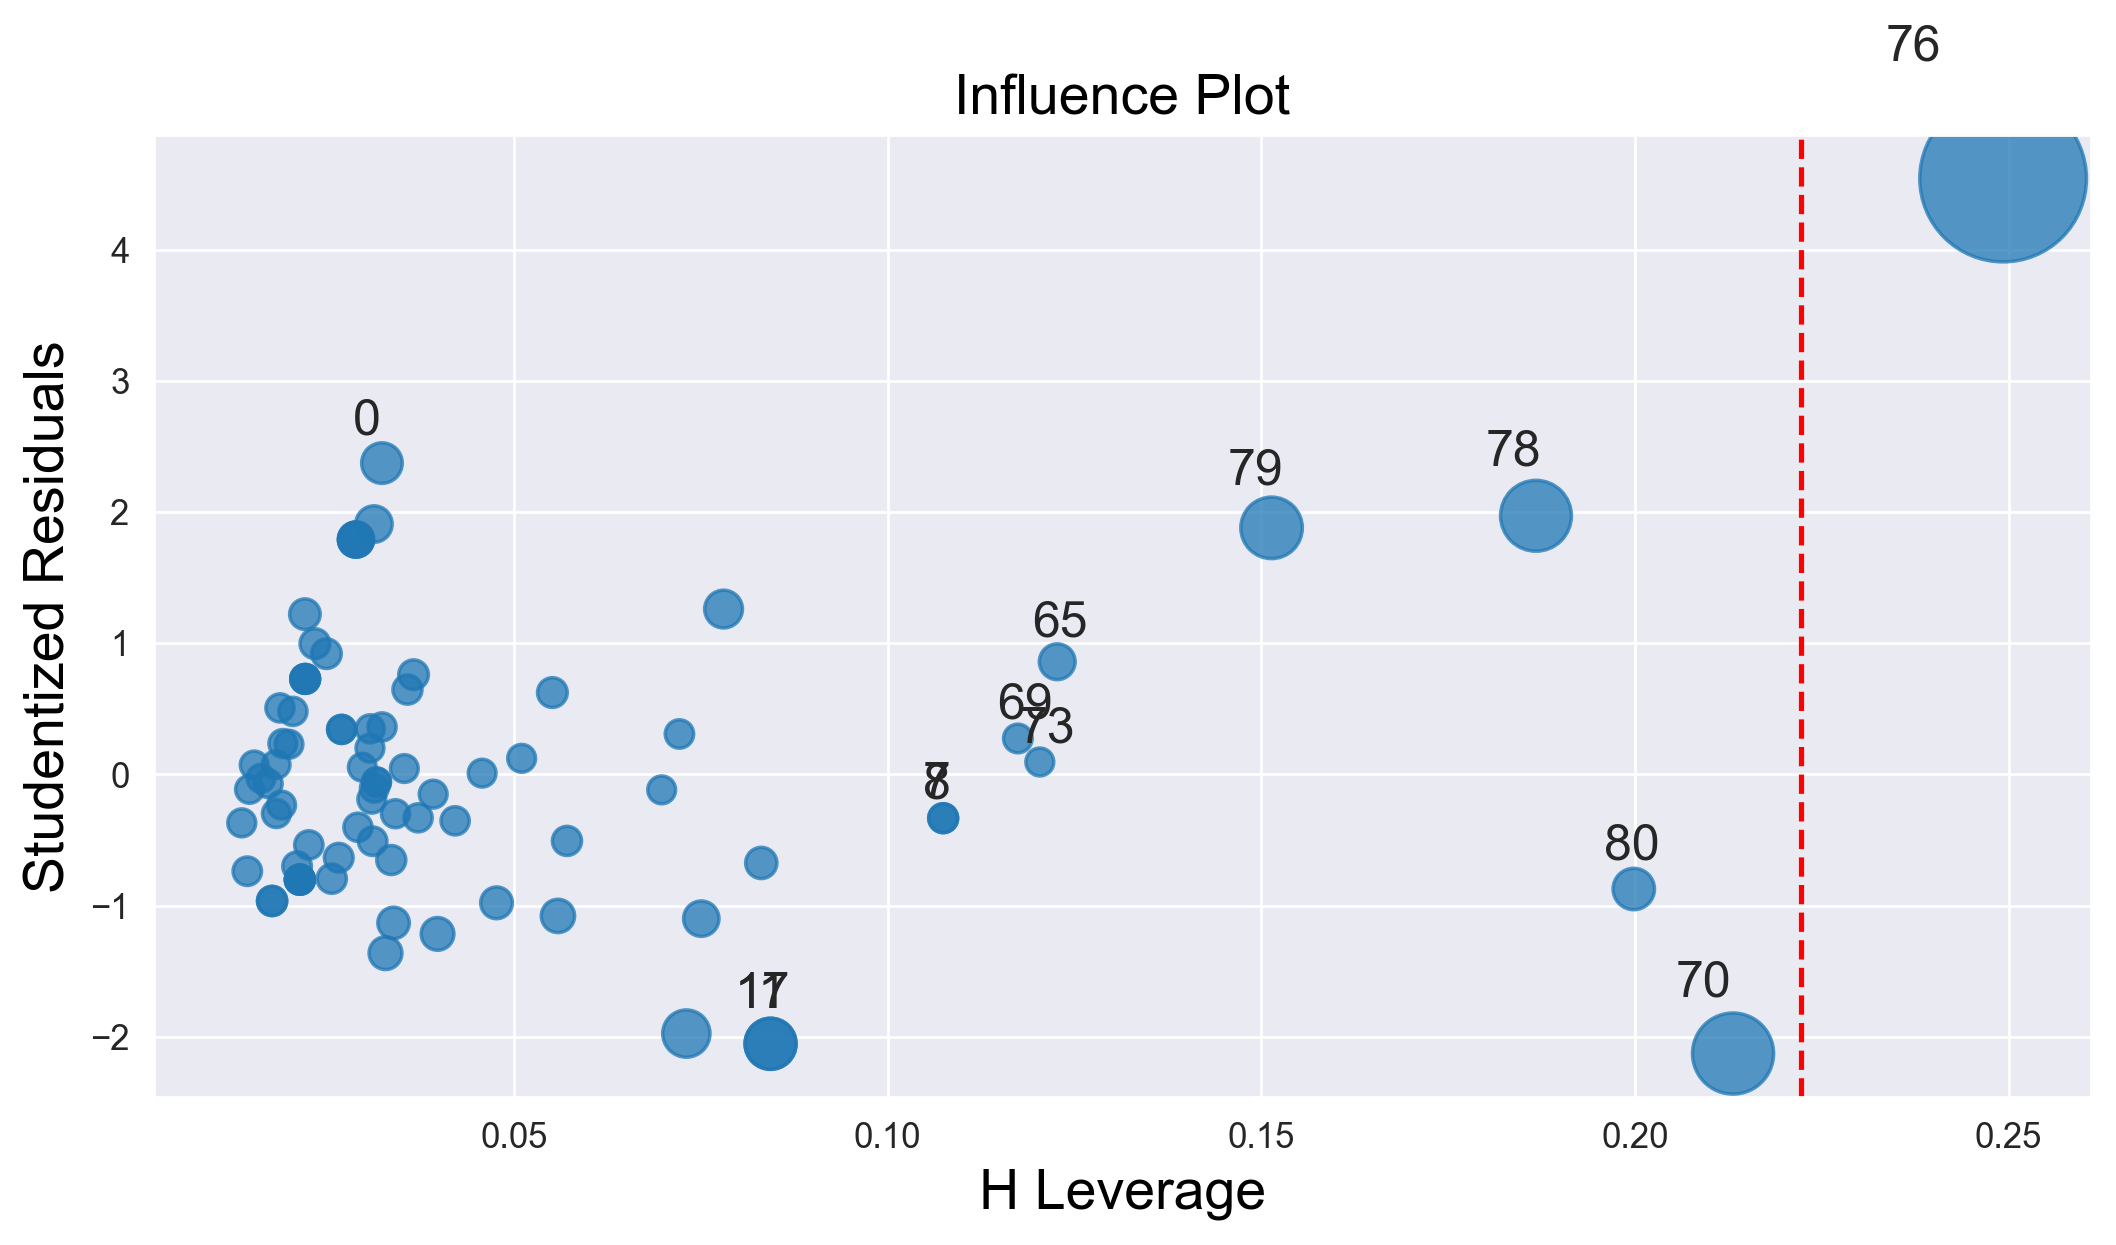

In [44]:
influence_plot(model)
plt.axvline(levarge_cutoff, color='red', linestyle='--')

In [45]:
#Improving the model
df.drop(index=[76], inplace=True)
df

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
75,175,18.762837,129,132.864163,42.778219
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [46]:
#Reset the index
df.reset_index(inplace=True)
df

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
75,75,175,18.762837,129,132.864163,42.778219
76,77,238,19.197888,115,150.576579,37.923113
77,78,263,34.000000,50,151.598513,15.769625
78,79,295,19.833733,119,167.944460,39.423099


In [47]:
df.drop(columns=['index'], inplace=True)

In [48]:
model= smf.ols('MPG~VOL+SP+HP',data=df).fit()

In [49]:
inf= model.get_influence()
c,p= inf.cooks_distance

<StemContainer object of 3 artists>

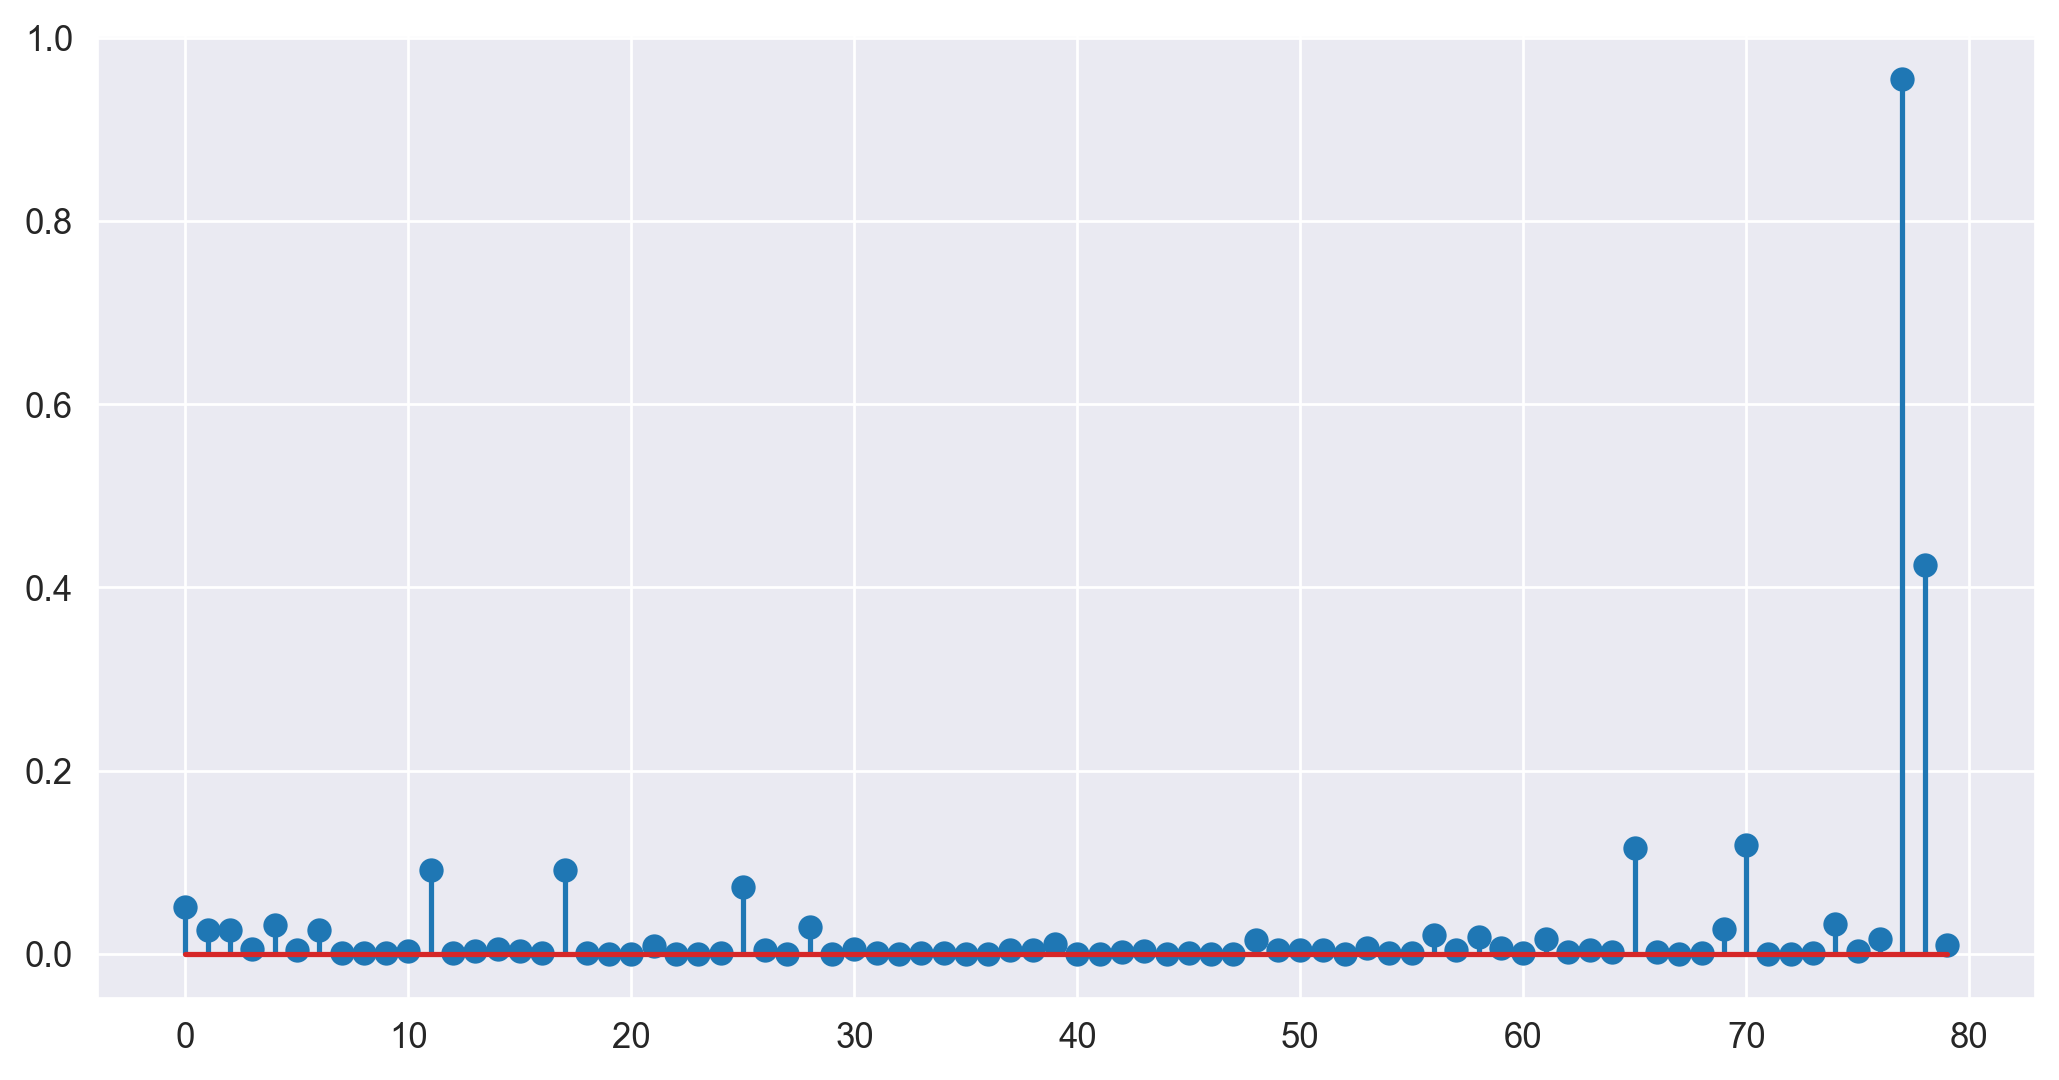

In [50]:
plt.stem(c)

In [51]:
np.argmax(c), np.max(c)

(77, 0.954869193631257)

In [52]:
#Fina;l Model

In [53]:
df.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [54]:
newdf= pd.DataFrame({
    'HP':[55,45,32],
    'VOL':[89,85,95],
    'SP':[105,110,120]
})

In [55]:
newdf

,HP,VOL,SP
0,55,89,105
1,45,85,110
2,32,95,120


In [56]:
model.predict(newdf)

0    43.197480
1    48.218334
2    53.561309
dtype: float64